### Questions to Solve

+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [81]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Ensuring that plots are rendered inline in the notebook
%matplotlib inline

In [82]:
df = pd.read_csv(r'C:\Users\shail\OneDrive\Shailesh\Personal\Personal Learning\Udemy Projects\Course Recommendation System\udemy_course_data.csv')
df.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

  content_duration   published_timestamp           subject  profit  \
0        1.5 hours  2017-01-18T20:58:58Z  Business Finance  429400   
1         39 hours  2017-03-09T16:34:20Z  Business Finance  209400   
2        2.5 hours  2016-12-19T19:26:30Z  Business Finance   97830   
3          3 hours  2017-05-30T20:07:24Z  Business Finance  232845   
4          2 hours  2016-12-13T14:57:18Z  Business Finance  255200   

  published_date published_time  year  month  day  
0     2017-01-18      20:58:58Z  2017      1   18  
1     2017-03-09      16:34:20Z  2017      3    9  
2     2016-12-19      19:26:30Z  2016     12   19  
3     2017-05-30      20:07:24Z  2017      5   30  
4     2016-12-13      14:57:18Z  2016     12   13

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

### EDA on Subject/Category

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [84]:
# Get the number of unique course titles in the DataFrame 'df'
# This helps us understand how many distinct courses are listed in the dataset
unique_course_count = df['course_title'].nunique()

# Display the count of unique course titles
print(unique_course_count)

3668


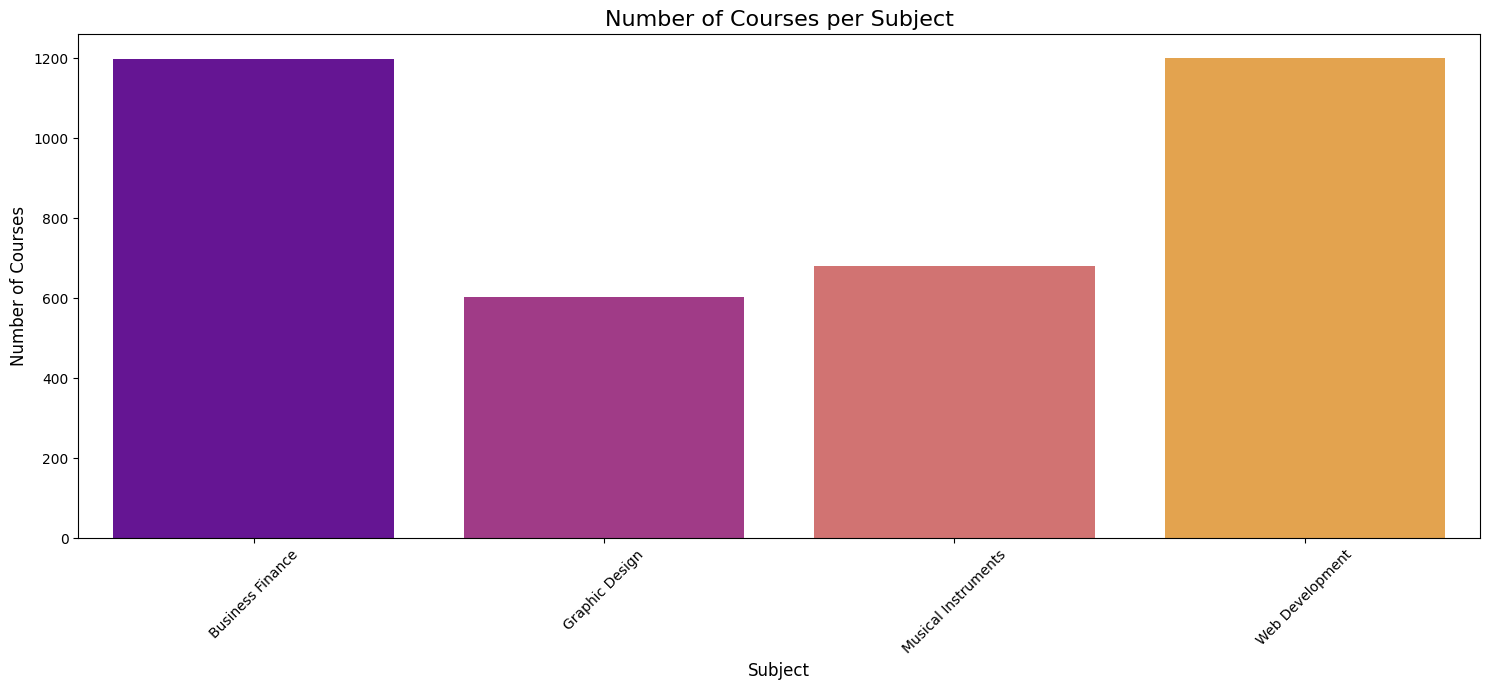

In [85]:
# Set the overall size of the plot to make it more readable
plt.figure(figsize=(15, 7))

# Plot the count of courses per subject using seaborn's countplot
# 'palette' controls the color scheme of the bars; 'plasma' gives a vibrant look
# 'x' argument should be explicitly set for better readability and future compatibility
sn.countplot(x='subject', data=df, palette='plasma')

# Add a title to the plot for context
plt.title('Number of Courses per Subject', fontsize=16)

# Label the x and y axes
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of Courses', fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# Improve layout so labels and title fit well
plt.tight_layout()

# Show the plot
plt.show()

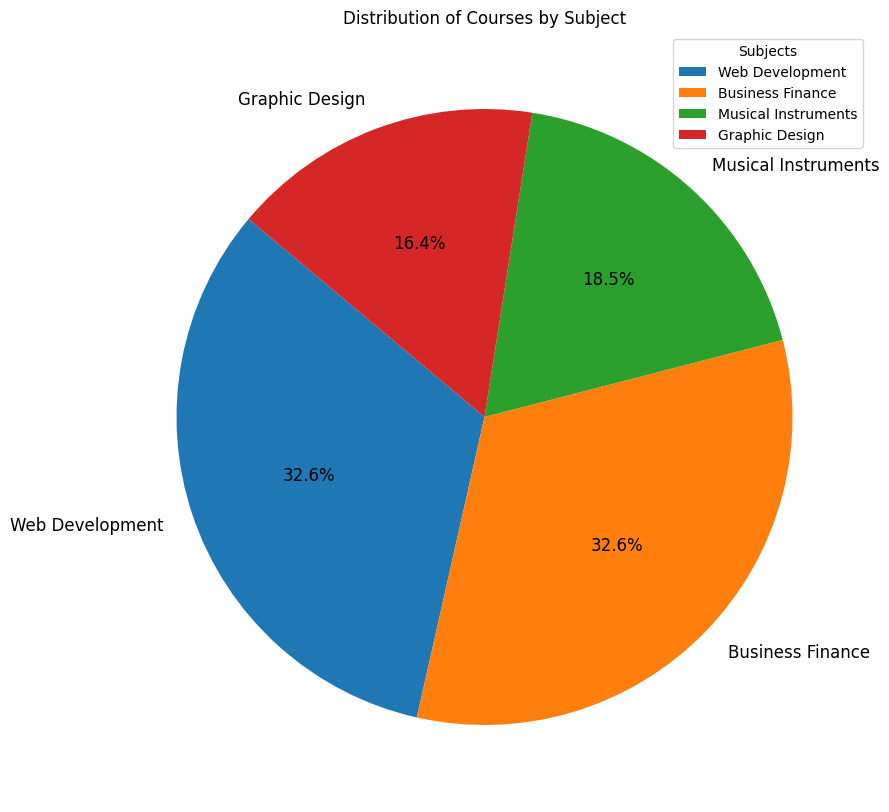

In [86]:
# Set figure size for clarity
plt.figure(figsize=(10, 8))

# Plotting the pie chart with improved visual elements
df['subject'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',               # Show percentage on each slice
    startangle=140,                  # Rotate the chart for better alignment
    label='',                        # Remove default axis label
    textprops={'fontsize': 12}       # Font size for labels
)

# Add legend for subjects
plt.legend(title='Subjects', labels=df['subject'].value_counts().index, loc='best')

# Ensure chart layout doesn't cut off labels
plt.tight_layout()

# Display the plot
plt.title('Distribution of Courses by Subject')
plt.show()

### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

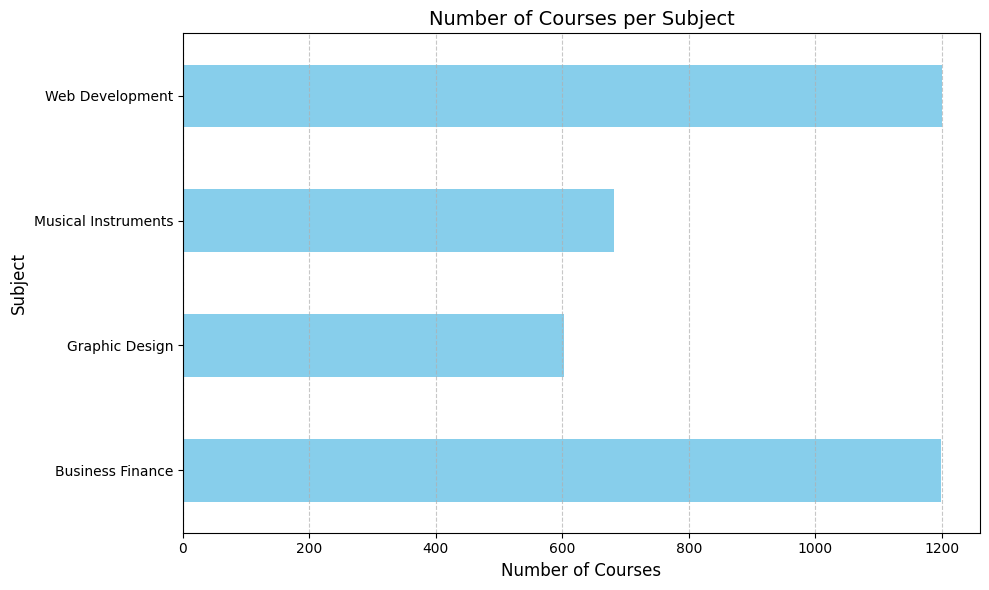

In [87]:
# Group the DataFrame by 'subject' and count the number of entries (courses) in each subject
# Then plot this as a horizontal bar chart
df.groupby('subject')['num_subscribers'].count().plot(
    kind='barh',            # Horizontal bar chart
    figsize=(10, 6),        # Set figure size for better readability
    color='skyblue'         # Optional: Set a friendly color
)

# Add a title to the chart
plt.title('Number of Courses per Subject', fontsize=14)

# Label the x and y axes
plt.xlabel('Number of Courses', fontsize=12)
plt.ylabel('Subject', fontsize=12)

# Add grid for easier comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

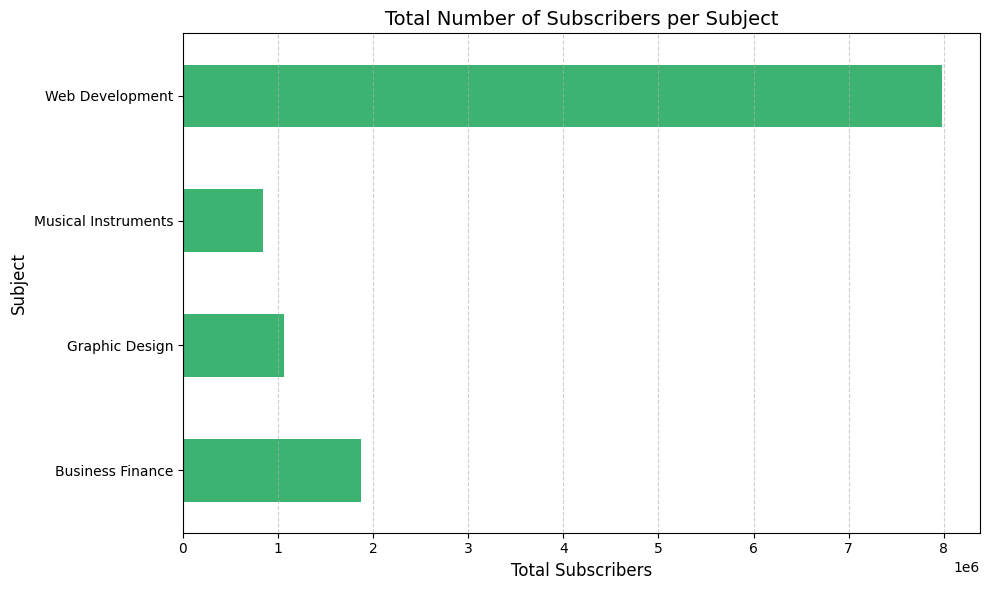

In [88]:
# Group the DataFrame by 'subject' and calculate the total (sum) number of subscribers for each subject
# Then plot the result as a horizontal bar chart
df.groupby('subject')['num_subscribers'].sum().plot(
    kind='barh',            # Create a horizontal bar chart
    figsize=(10, 6),        # Set figure size for better readability
    color='mediumseagreen'  # Optional: Set a color for visual appeal
)

# Add a title to describe the plot
plt.title('Total Number of Subscribers per Subject', fontsize=14)

# Label the axes for clarity
plt.xlabel('Total Subscribers', fontsize=12)
plt.ylabel('Subject', fontsize=12)

# Add grid lines along the x-axis to help interpret values
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

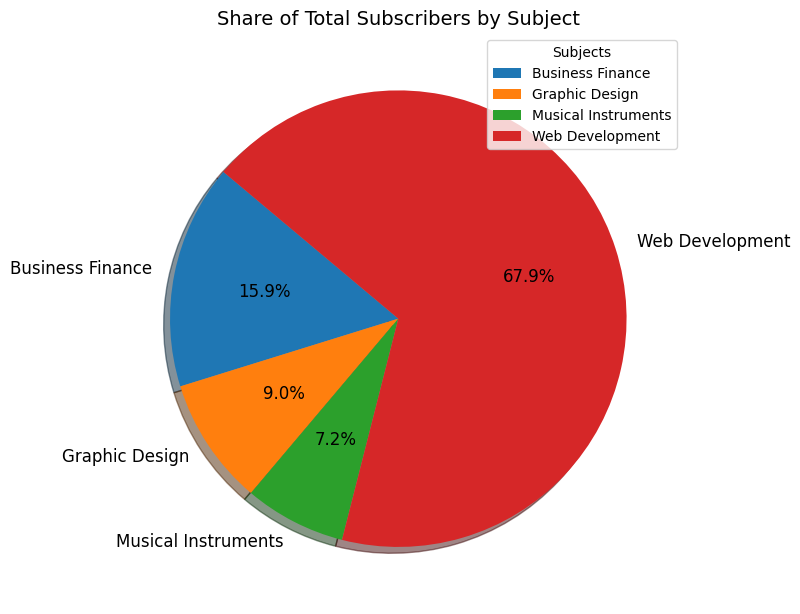

In [89]:
# Group the data by 'subject' and sum the number of subscribers for each subject
subscriber_distribution = df.groupby('subject')['num_subscribers'].sum()

# Plot the data as a pie chart
subscriber_distribution.plot(
    kind='pie',               # Pie chart type
    autopct='%1.1f%%',        # Show percentages with one decimal point
    startangle=140,           # Rotate the start angle for better layout
    shadow=True,              # Add shadow for depth effect
    figsize=(8, 8),           # Set the figure size
    textprops={'fontsize': 12}  # Font size for slice labels
)

# Set the title of the pie chart
plt.title('Share of Total Subscribers by Subject', fontsize=14)

# Remove the y-axis label (not needed in pie charts)
plt.ylabel('')

# Add legend to the side
plt.legend(title='Subjects', loc='best')

# Improve layout so nothing is clipped
plt.tight_layout()

# Display the plot
plt.show()

### EDA on Levels

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels


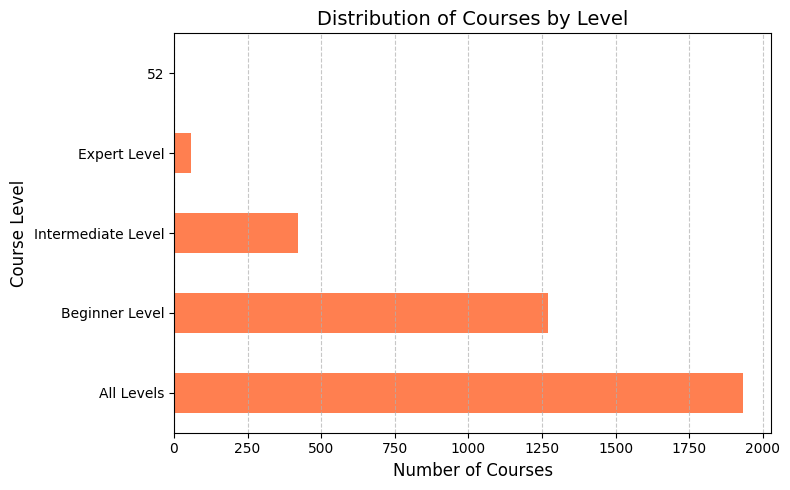

In [90]:
# Count the number of occurrences of each course level in the dataset
level_counts = df['level'].value_counts()

# Plot the counts as a horizontal bar chart
level_counts.plot(
    kind='barh',             # Horizontal bar chart
    figsize=(8, 5),          # Set a suitable figure size
    color='coral'            # Optional: Use a warm color for visual clarity
)

# Add a title to describe the plot
plt.title('Distribution of Courses by Level', fontsize=14)

# Label the axes
plt.xlabel('Number of Courses', fontsize=12)
plt.ylabel('Course Level', fontsize=12)

# Add grid lines along the x-axis to enhance readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optimize layout to prevent overlap
plt.tight_layout()

# Show the final plot
plt.show()

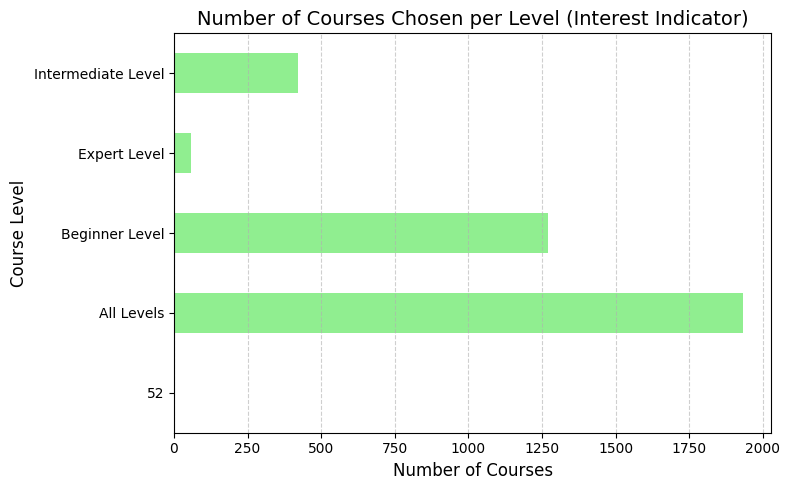

In [91]:
# Group the dataset by 'level' and count the number of courses in each level
# This indirectly reflects how many times people chose a course at each level
level_interest = df.groupby('level')['num_subscribers'].count()

# Plot the results as a horizontal bar chart
level_interest.plot(
    kind='barh',             # Horizontal bar chart
    figsize=(8, 5),          # Set the figure size for readability
    color='lightgreen'       # Optional: Use a visually pleasing color
)

# Add a title to explain the purpose of the chart
plt.title('Number of Courses Chosen per Level (Interest Indicator)', fontsize=14)

# Label the axes
plt.xlabel('Number of Courses', fontsize=12)
plt.ylabel('Course Level', fontsize=12)

# Add grid lines to help compare values easily
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Apply tight layout to avoid clipping
plt.tight_layout()

# Display the chart
plt.show()

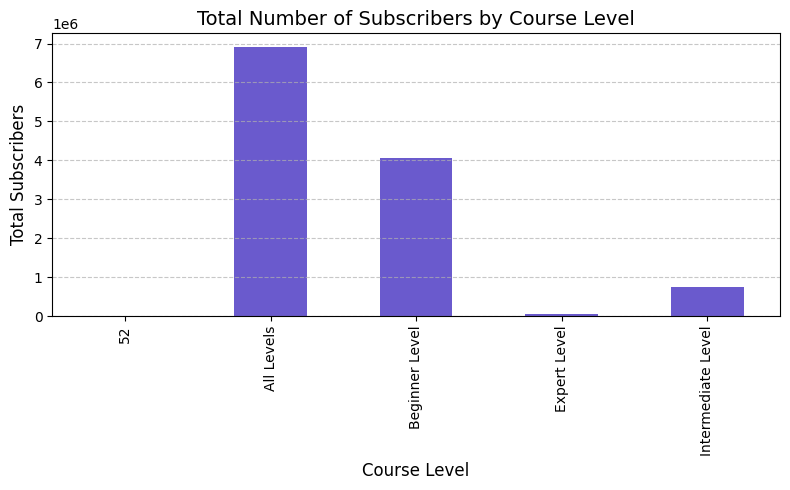

In [92]:
# Group the dataset by 'level' and calculate the total number of subscribers for each level
# This shows how popular each course level is based on total user interest
level_subscribers = df.groupby('level')['num_subscribers'].sum()

# Plot the result as a vertical bar chart
level_subscribers.plot(
    kind='bar',              # Vertical bar chart
    figsize=(8, 5),          # Set figure size for better readability
    color='slateblue'        # Optional: use a calm color for better contrast
)

# Add a title to the chart
plt.title('Total Number of Subscribers by Course Level', fontsize=14)

# Label the axes
plt.xlabel('Course Level', fontsize=12)
plt.ylabel('Total Subscribers', fontsize=12)

# Add gridlines for easy comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout to avoid text clipping
plt.tight_layout()

# Show the final plot
plt.show()

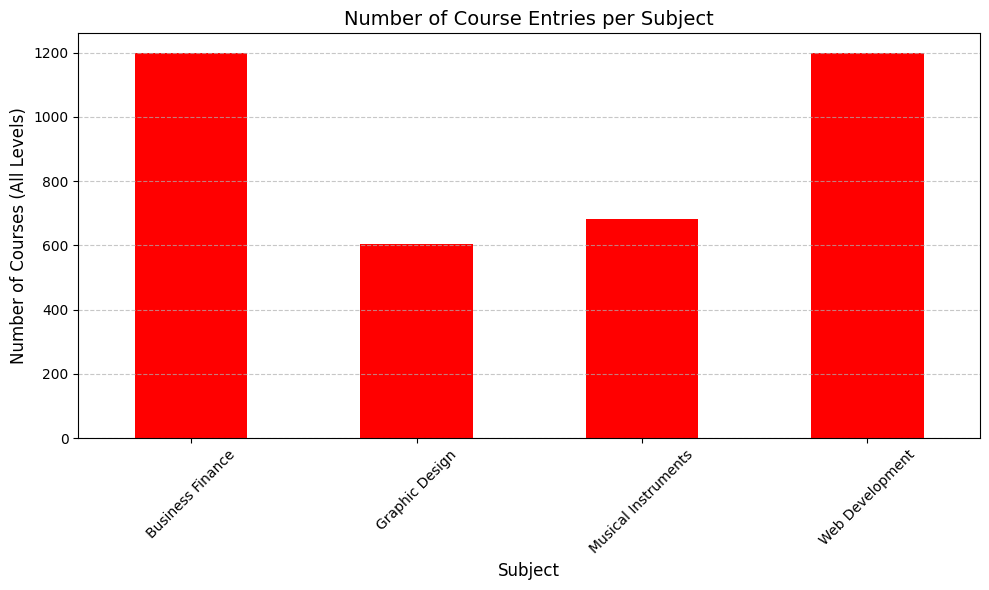

In [93]:
# Group the dataset by 'subject' and count how many course levels are listed under each subject
# This tells us how many courses (regardless of level type) are available for each subject
levels_per_subject = df.groupby('subject')['level'].count()

# Plot the results as a vertical bar chart
levels_per_subject.plot(
    kind='bar',             # Vertical bar chart
    figsize=(10, 6),        # Set figure size for clarity
    color='red'             # Use red bars for emphasis
)

# Add a chart title
plt.title('Number of Course Entries per Subject', fontsize=14)

# Label the axes
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of Courses (All Levels)', fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# Add grid lines on y-axis to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Show the chart
plt.show()

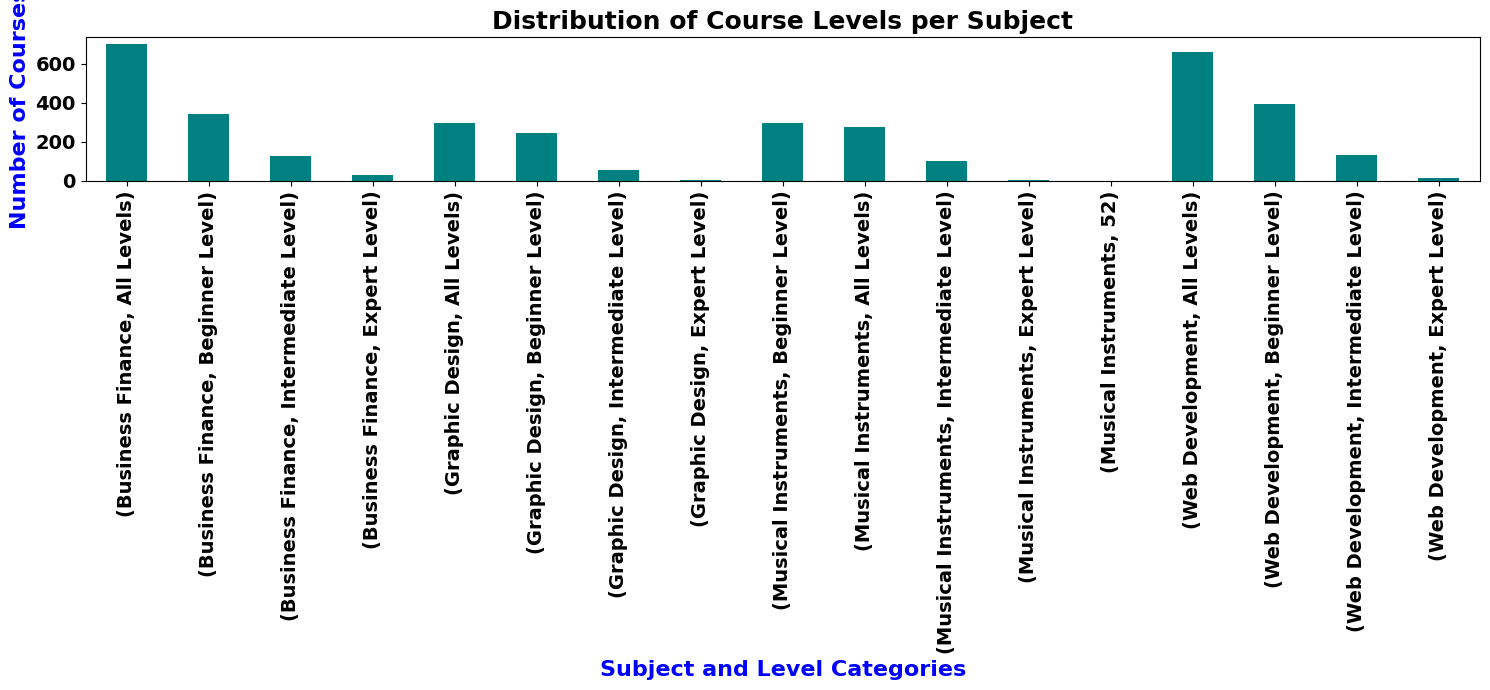

In [94]:
# Set the size of the figure to ensure everything is clearly visible
plt.figure(figsize=(15, 7))

# Group the DataFrame by 'subject' and then count the number of courses per 'level' within each subject
# This shows how many courses of each level exist in each subject category
df.groupby(['subject'])['level'].value_counts().plot(
    kind='bar',              # Vertical bar chart
    color='teal'             # Optional: use a consistent color for all bars
)

# Customize tick label font size and weight for better visibility
plt.xticks(fontsize=14, fontweight='bold', rotation=90)  # Rotated to avoid label overlap
plt.yticks(fontsize=14, fontweight='bold')

# Add axis labels with font styling
plt.xlabel('Subject and Level Categories', fontsize=16, fontweight='bold', color='blue')
plt.ylabel('Number of Courses', fontsize=16, fontweight='bold', color='blue')

# Add a title to make the plot self-explanatory
plt.title('Distribution of Course Levels per Subject', fontsize=18, fontweight='bold')

# Adjust layout to ensure labels and elements fit properly
plt.tight_layout()

# Display the final plot
plt.show()

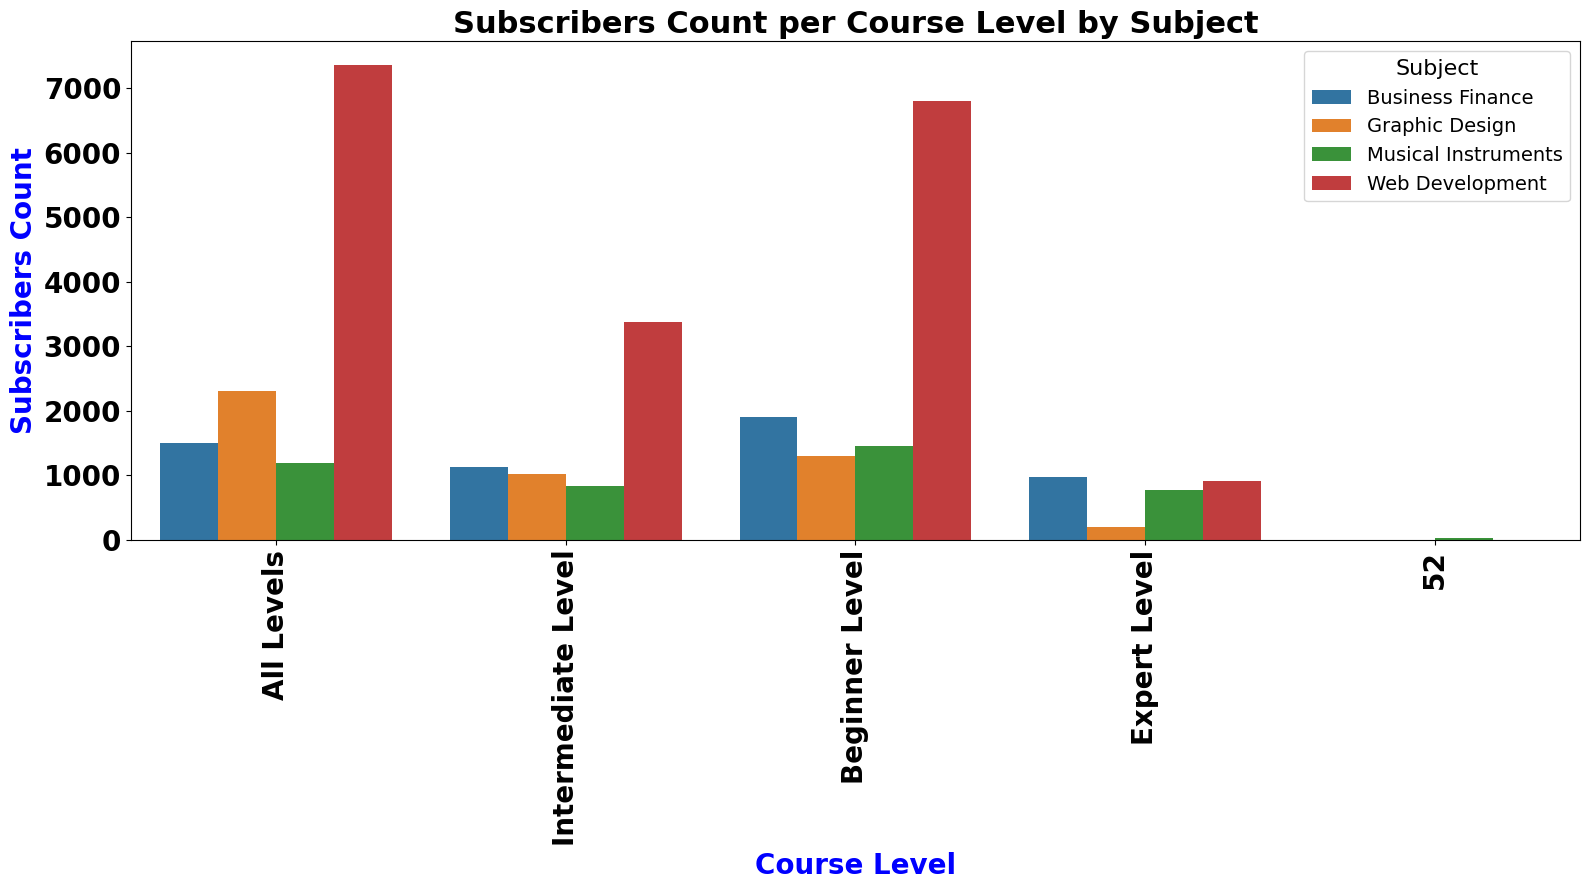

In [95]:
# Set the figure size to ensure the chart is large and readable
plt.figure(figsize=(16, 9))

# Create a grouped bar chart using seaborn
# x = course level (Beginner, Intermediate, All Levels, etc.)
# y = total number of subscribers
# hue = subject (to split bars by subject for each level)
# This helps us compare how different subjects perform at each level
sn.barplot(
    x='level',
    y='num_subscribers',
    hue='subject',
    data=df,              
    ci=None      # Remove confidence interval for cleaner bars
)

# Format x-axis tick labels for better visibility
plt.xticks(fontsize=20, fontweight='bold', rotation='vertical')

# Format y-axis tick labels
plt.yticks(fontsize=20, fontweight='bold')

# Label the x-axis
plt.xlabel('Course Level', fontsize=20, fontweight='bold', color='blue')

# Label the y-axis
plt.ylabel('Subscribers Count', fontsize=20, fontweight='bold', color='blue')

# Add a chart title (optional but recommended for clarity)
plt.title('Subscribers Count per Course Level by Subject', fontsize=22, fontweight='bold')

# Display the legend clearly
plt.legend(title='Subject', title_fontsize=16, fontsize=14)

# Optimize layout to avoid overlap
plt.tight_layout()

# Render the plot
plt.show()

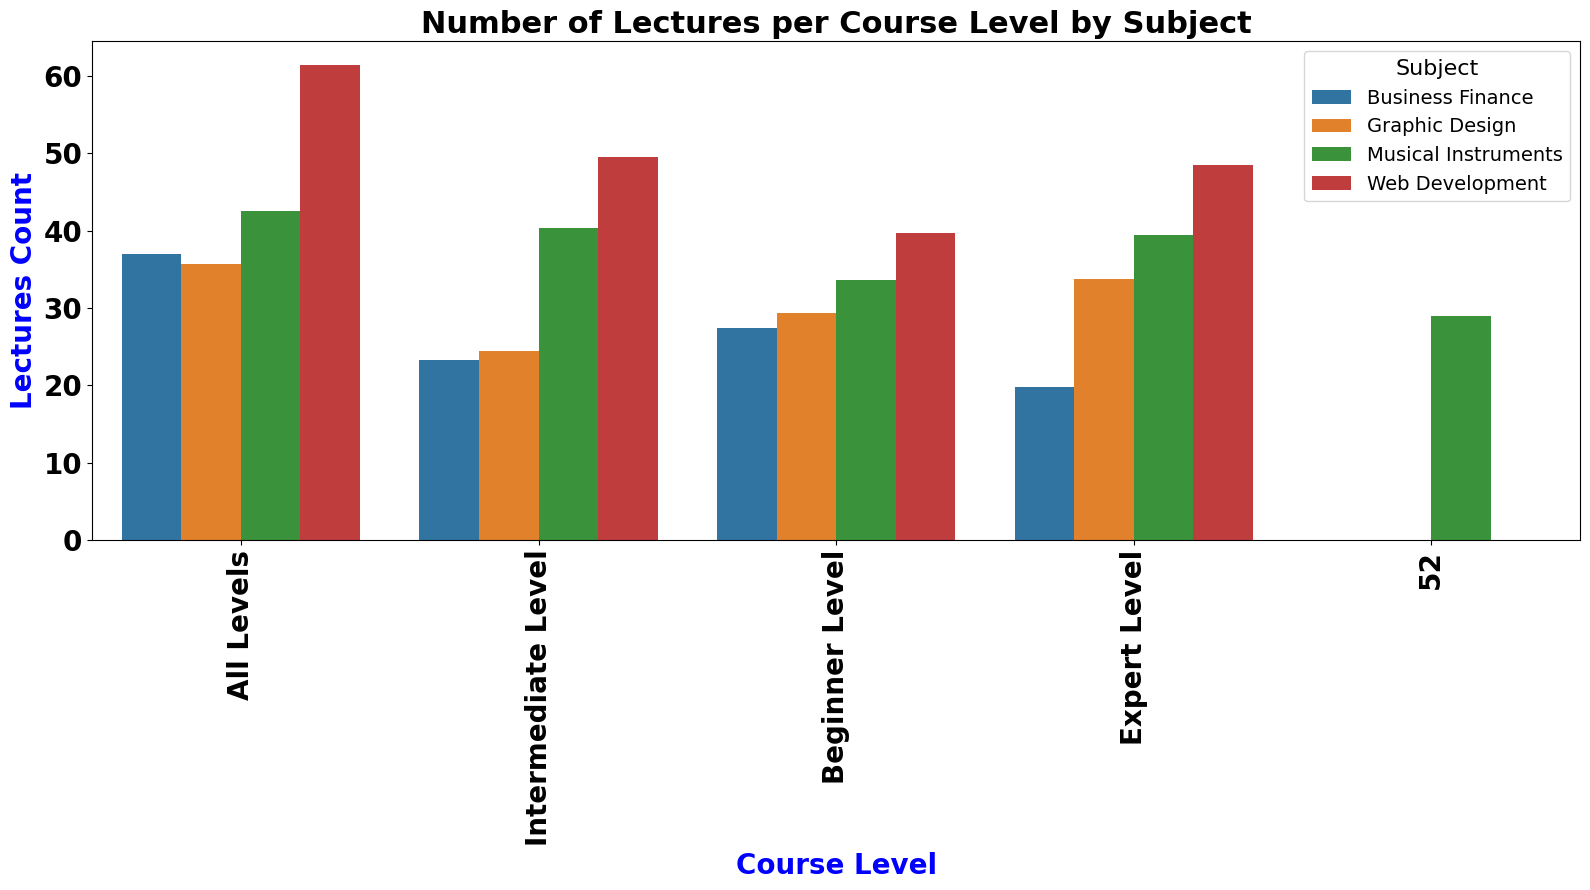

In [96]:
# Set the figure size for clear visibility of all elements
plt.figure(figsize=(16, 9))

# Create a grouped bar chart using seaborn
# x = course level (e.g., Beginner, Intermediate, All Levels)
# y = number of lectures (aggregated)
# hue = subject (distinguishing bars by subject within each level)
sn.barplot(
    x='level',
    y='num_lectures',
    hue='subject',
    data=df,
    ci=None                   # Remove confidence interval bars
)

# Format x-axis tick labels (bold and large for clarity)
plt.xticks(fontsize=20, fontweight='bold', rotation='vertical')

# Format y-axis tick labels
plt.yticks(fontsize=20, fontweight='bold')

# Add x-axis label with styling
plt.xlabel('Course Level', fontsize=20, fontweight='bold', color='blue')

# Add y-axis label with styling
plt.ylabel('Lectures Count', fontsize=20, fontweight='bold', color='blue')

# Add a title for better context
plt.title('Number of Lectures per Course Level by Subject', fontsize=22, fontweight='bold')

# Show legend for subjects clearly
plt.legend(title='Subject', title_fontsize=16, fontsize=14)

# Improve layout to avoid clipping or overlap
plt.tight_layout()

# Display the plot
plt.show()

In [97]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

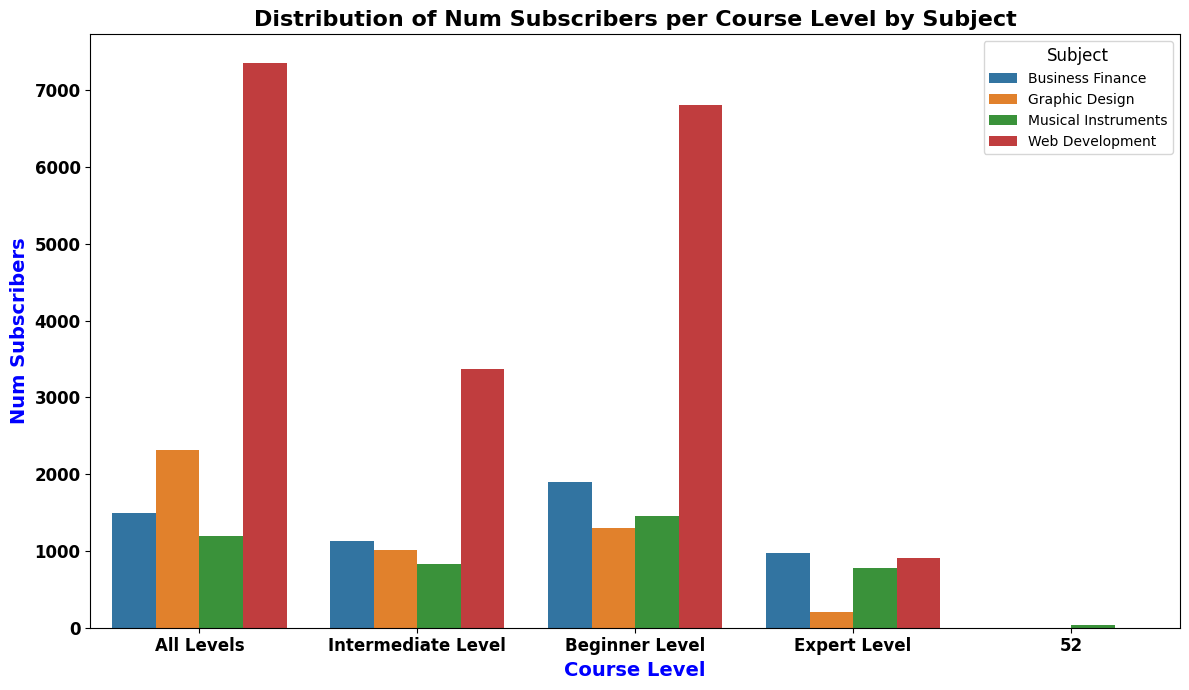

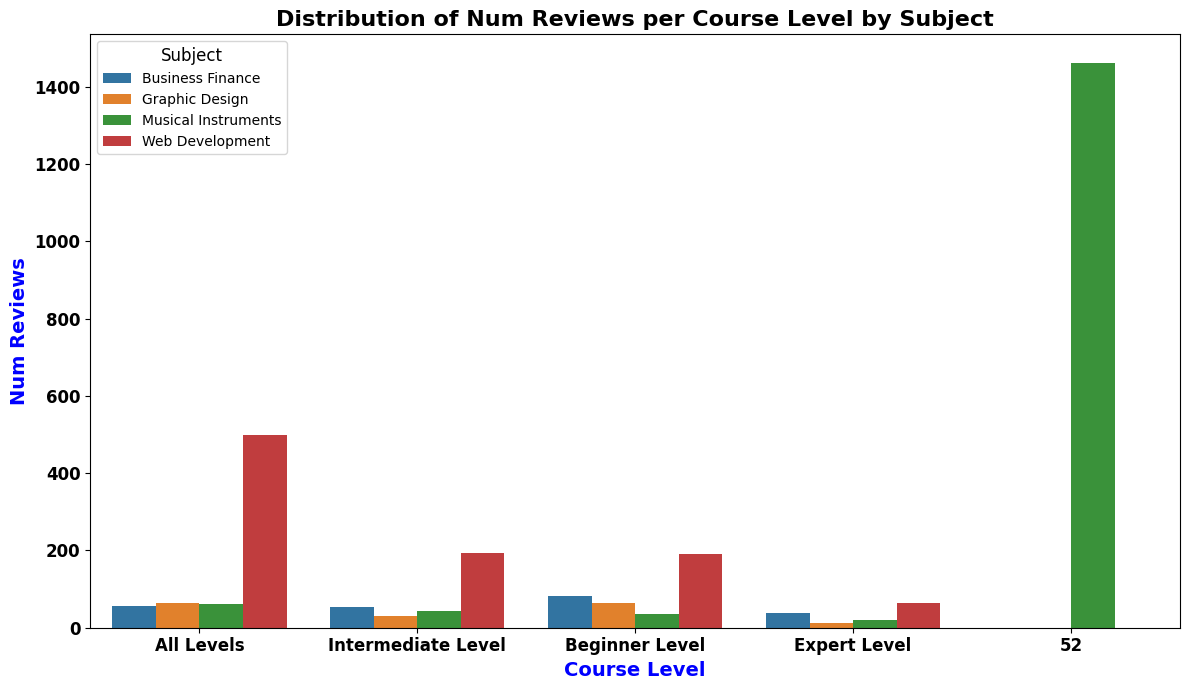

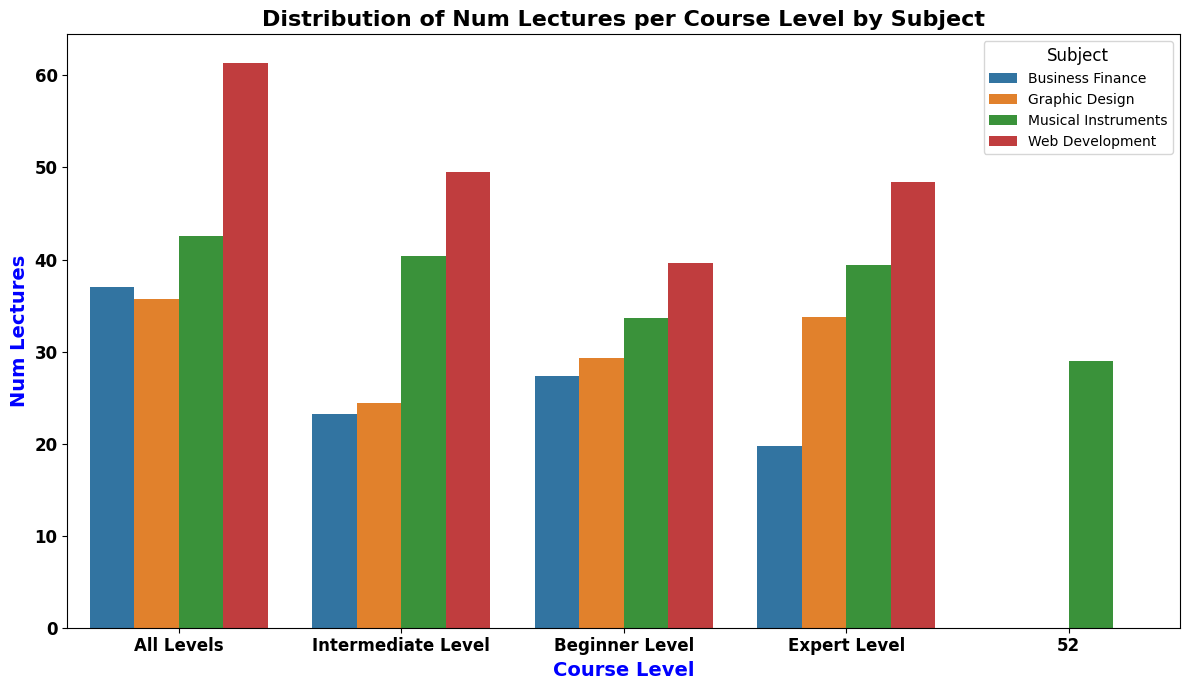

In [98]:
# Define a reusable function to plot feature-wise barplots by course level and subject
def plotdata(df, feature):
    # Set the plot size for readability
    plt.figure(figsize=(12, 7))
    
    # Set a dynamic title based on the feature being plotted
    plt.title(f"Distribution of {feature.replace('_', ' ').title()} per Course Level by Subject", fontsize=16, fontweight='bold')
    
    # Create a grouped bar plot using seaborn
    sn.barplot(
        x='level',
        y=feature,
        hue='subject',
        data=df,
        ci=None                 # Remove confidence intervals for clean bars
    )

    # Customize axis labels
    plt.xlabel("Course Level", fontsize=14, fontweight='bold', color='blue')
    plt.ylabel(feature.replace('_', ' ').title(), fontsize=14, fontweight='bold', color='blue')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    
    # Add legend with title
    plt.legend(title='Subject', title_fontsize=12, fontsize=10)
    
    # Adjust layout to prevent clipping
    plt.tight_layout()
    
    # Show the final plot
    plt.show()


# List of features we want to analyze across course level and subject
featureslist = ['num_subscribers', 'num_reviews', 'num_lectures']

# Call the plotting function for each feature in the list
for feature in featureslist:
    plotdata(df, feature)

### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [99]:
df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [100]:
# Step 1: Convert the 'price' column to string (if not already)
df['price'] = df['price'].astype(str)

# Step 2: Replace 'Free' or 'TRUE' with '0' using regex pattern
df['price'] = df['price'].str.replace('TRUE|Free', '0', regex=True)

# Optional: Convert the price column to numeric for analysis
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Step 3: Display the unique values to verify changes
print(df['price'].unique())

[200  75  45  95 150  65 195  30  20  50 175 140 115 190 125  60 145 105
 155 185 180 120  25 160  40   0 100  90  35  80  70  55 165 130  85 170
 110 135]


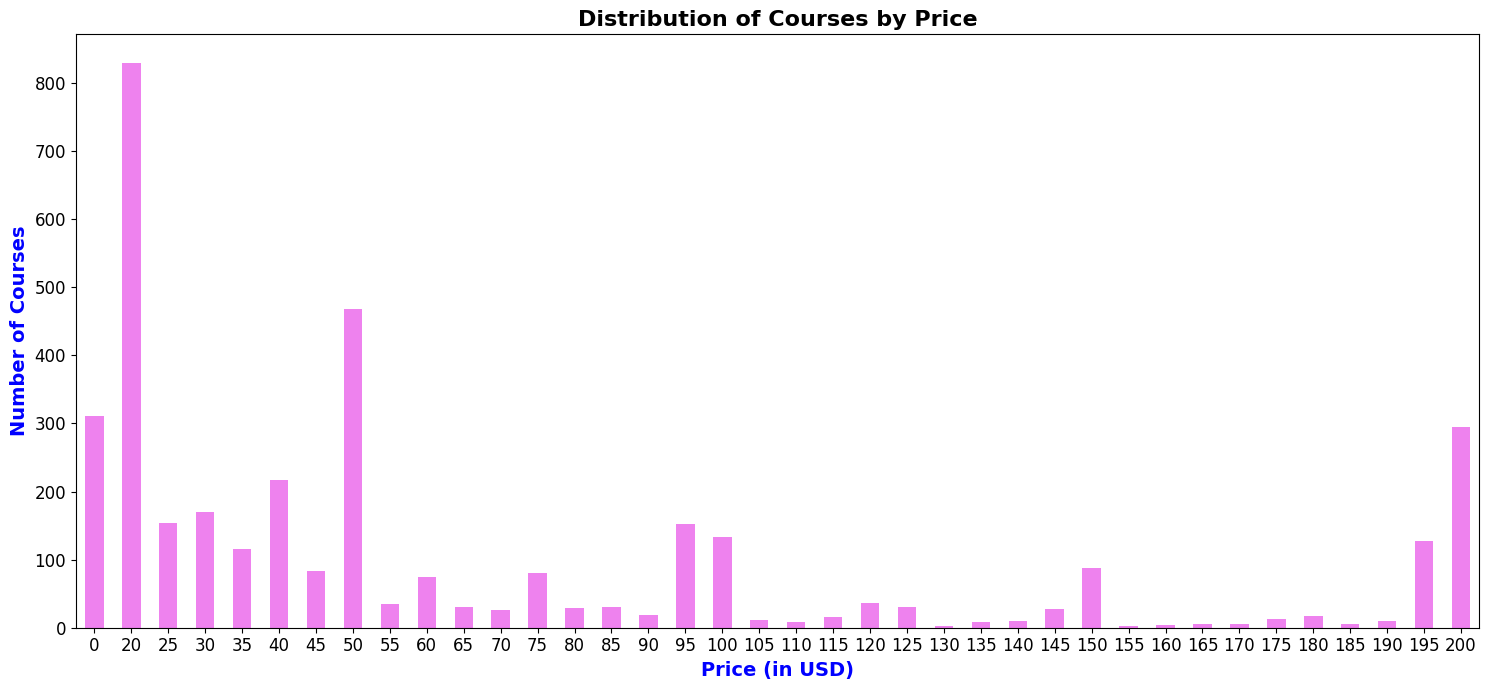

In [101]:
# Set the size of the plot for better readability
plt.figure(figsize=(15, 7))

# Plot the frequency (count) of each unique price in the dataset
# This shows how many courses are offered at each price point
df['price'].value_counts().sort_index().plot(
    kind='bar',         # Vertical bar chart
    color='violet'      # Set bar color to violet
)

# Set the title for context
plt.title('Distribution of Courses by Price', fontsize=16, fontweight='bold')

# Label the axes
plt.xlabel('Price (in USD)', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Number of Courses', fontsize=14, fontweight='bold', color='blue')

# Rotate x-axis labels if price values are close
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Improve layout to avoid label overlap
plt.tight_layout()

# Show the chart
plt.show()

In [102]:
# Calculate the profit for each course
# Profit is estimated as: price × number of subscribers
# This assumes all subscribers paid the full listed price
df['profit'] = df['price'] * df['num_subscribers']

# Display the first 3 rows to verify the new 'profit' column
df.head(3)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   

  content_duration   published_timestamp           subject  profit  \
0        1.5 hours  2017-01-18T20:58:58Z  Business Finance  429400   
1         39 hours  2017-03-09T16:34:20Z  Business Finance  209400   
2        2.5 hours  2016-12-19T19:26:30Z  Business Finance   97830   

  published_date published_time  year  month  day  
0     2017-01-18      20:58:58Z  2017      1   18  
1     2017-03-09      16:34:20Z  2017      3    9  
2     2016-12-19      19:26:30Z  2016     12   19

In [103]:
# Find the course(s) with the highest profit
# This filters the DataFrame where 'profit' equals the maximum profit value
most_profitable_course = df[df['profit'] == df['profit'].max()]

# Style the output using a background color gradient (for better visual emphasis)
# 'plasma' colormap provides a vivid, attractive gradient
most_profitable_course.style.background_gradient(cmap='plasma')

In [104]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                                200
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                          24316800
published_date                                     

In [105]:
# Find the course(s) with the lowest profit
# These are typically free courses or ones with very few subscribers
least_profitable_course = df[df['profit'] == df['profit'].min()]

# Apply a color gradient for easier visual inspection (especially useful in Jupyter notebooks)
least_profitable_course.style.background_gradient(cmap='plasma')

In [106]:
# Calculate the mean (average) profit across all courses
average_profit = df['profit'].mean()

# Filter the DataFrame to include only courses with profit >= average
# This gives a list of relatively high-performing (above average) courses
avg_profitable_courses = df[df['profit'] >= average_profit]

# Apply a gradient styling to visually highlight the higher values
avg_profitable_courses.style.background_gradient(cmap='plasma')

In [107]:
# Check the unique values in the 'is_paid' column
# This tells us the different categories — usually 'True' for paid and 'False' for free
df['is_paid'].unique()

array([ True, False])

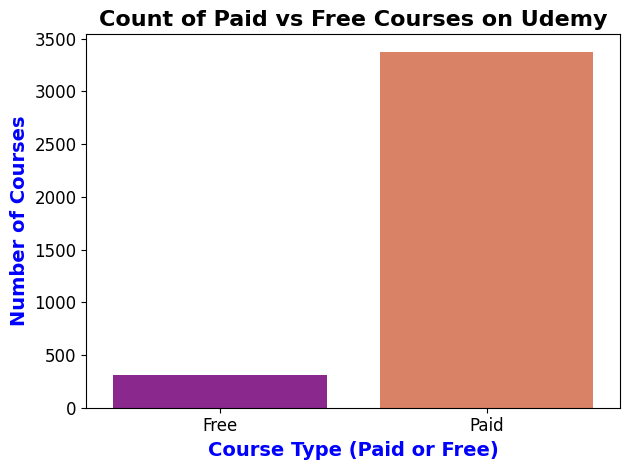

In [108]:
# Plot a count of paid vs free courses using seaborn
# x-axis: course type (Paid or Free)
# y-axis: number of courses
sn.countplot(
    x='is_paid',            # Column to group by
    data=df,                # DataFrame to use
    palette='plasma'        # Color palette for bars
)

# Add title and labels to the plot
plt.title('Count of Paid vs Free Courses on Udemy', fontsize=16, fontweight='bold')
plt.xlabel('Course Type (Paid or Free)', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Number of Courses', fontsize=14, fontweight='bold', color='blue')

# Update tick labels for clarity
plt.xticks(ticks=[0, 1], labels=['Free', 'Paid'], fontsize=12)
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

In [109]:
# Group the dataset by 'is_paid' (Paid or Free) and 'subject'
# Then count how many courses exist in each subject under each payment type
subject_counts_by_payment = df.groupby(['is_paid'])['subject'].value_counts()

# Display the result
print(subject_counts_by_payment)

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: count, dtype: int64


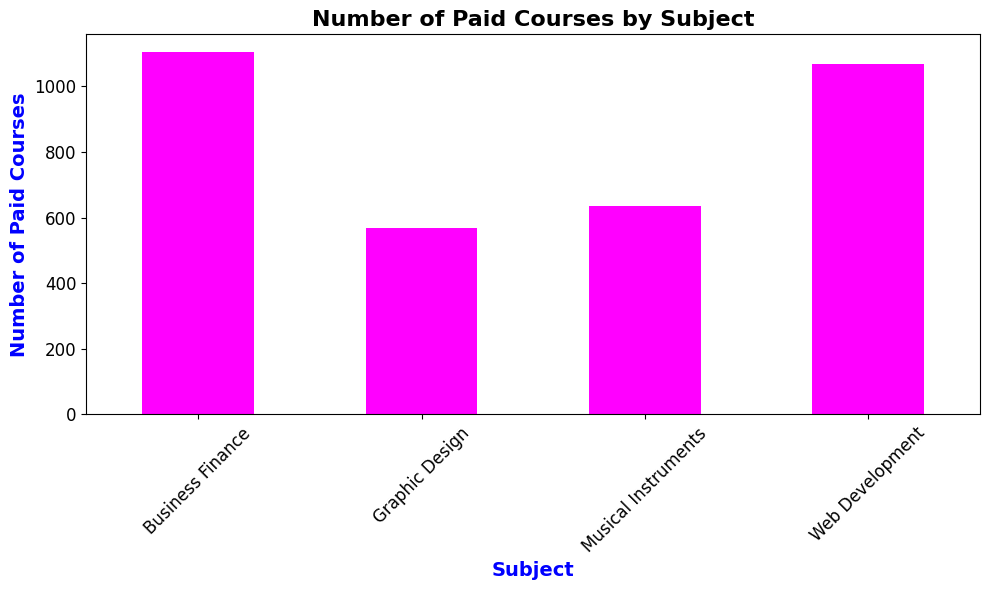

In [110]:
# Filter the DataFrame to include only paid courses
paid_courses = df[df['is_paid'] == True]

# Group the paid courses by 'subject' and count the number of courses per subject
subject_counts = paid_courses.groupby('subject').size()

# Plot the result as a vertical bar chart
subject_counts.plot(
    kind='bar',             # Vertical bar chart
    color='magenta',        # Set bar color to magenta
    figsize=(10, 6)         # Set figure size for clarity
)

# Add a title and axis labels
plt.title('Number of Paid Courses by Subject', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Number of Paid Courses', fontsize=14, fontweight='bold', color='blue')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Optimize layout
plt.tight_layout()

# Display the chart
plt.show()

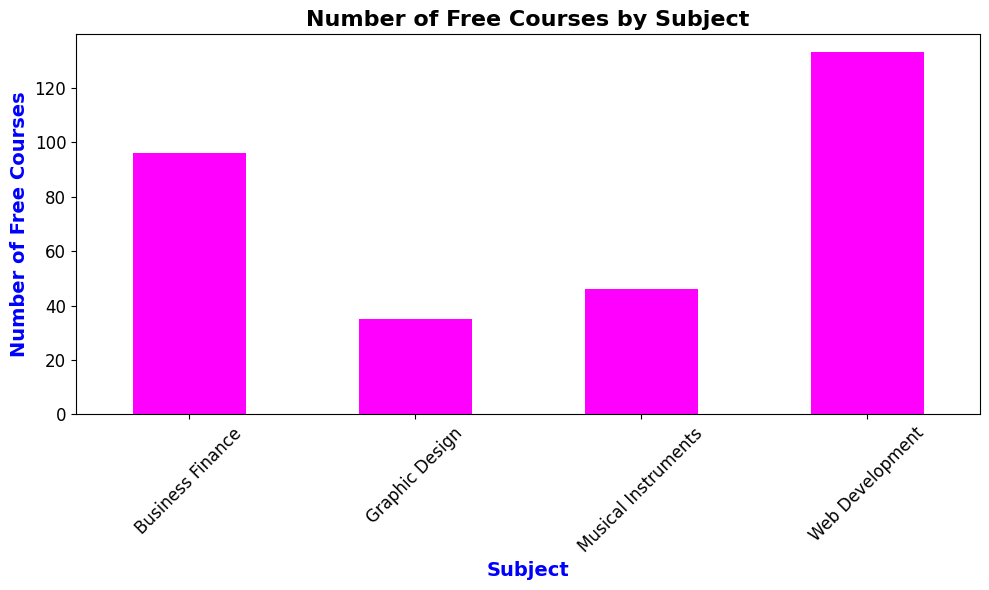

In [111]:
# Filter the DataFrame to include only free courses
free_courses = df[df['is_paid'] == False]

# Group the free courses by subject and count how many free courses exist per subject
free_subject_counts = free_courses.groupby('subject').size()

# Plot the counts as a vertical bar chart
free_subject_counts.plot(
    kind='bar',              # Vertical bar chart
    color='magenta',         # Bar color
    figsize=(10, 6)          # Set figure size
)

# Add chart title and axis labels
plt.title('Number of Free Courses by Subject', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Number of Free Courses', fontsize=14, fontweight='bold', color='blue')

# Format x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Improve layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [112]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

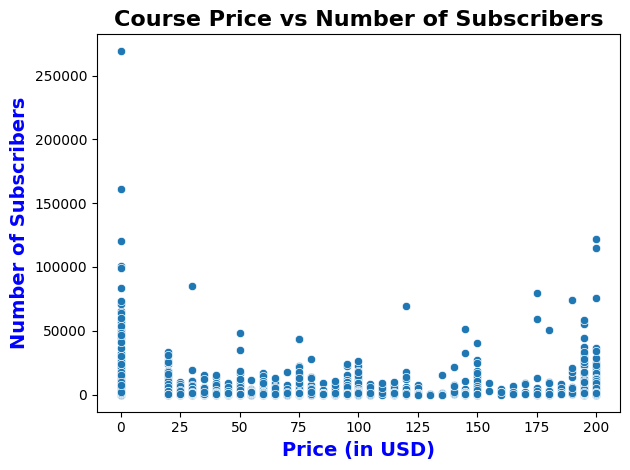

In [113]:
# Create a scatter plot to visualize the relationship between course price and number of subscribers
sn.scatterplot(
    data=df,                 # DataFrame to use
    x='price',               # X-axis: price of the course
    y='num_subscribers'      # Y-axis: number of subscribers
)

# Add a title for context
plt.title('Course Price vs Number of Subscribers', fontsize=16, fontweight='bold')

# Label the axes
plt.xlabel('Price (in USD)', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Number of Subscribers', fontsize=14, fontweight='bold', color='blue')

# Optional: Use log scale on y-axis if most points are clustered low and a few outliers are very high
# plt.yscale('log')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

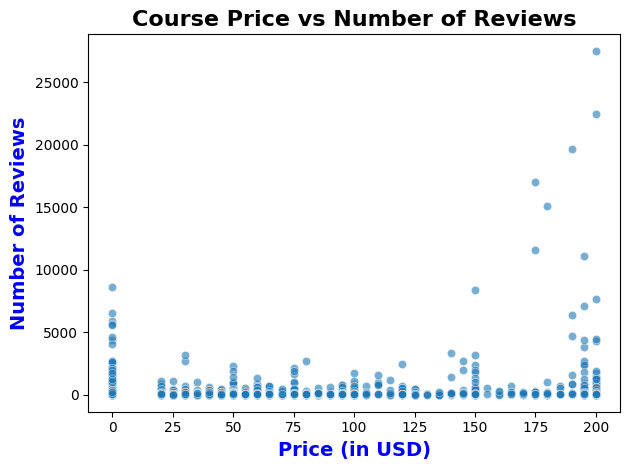

In [114]:
# Create a scatter plot to analyze the relationship between price and number of reviews
sn.scatterplot(
    data=df,                # Use the Udemy course DataFrame
    x='price',              # X-axis: course price
    y='num_reviews',        # Y-axis: number of reviews
    alpha=0.6               # Optional: add transparency to handle overlapping points
)

# Add a descriptive title
plt.title('Course Price vs Number of Reviews', fontsize=16, fontweight='bold')

# Label the axes
plt.xlabel('Price (in USD)', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold', color='blue')

# Optional enhancement: log scale for review count to handle skewed data
# plt.yscale('log')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

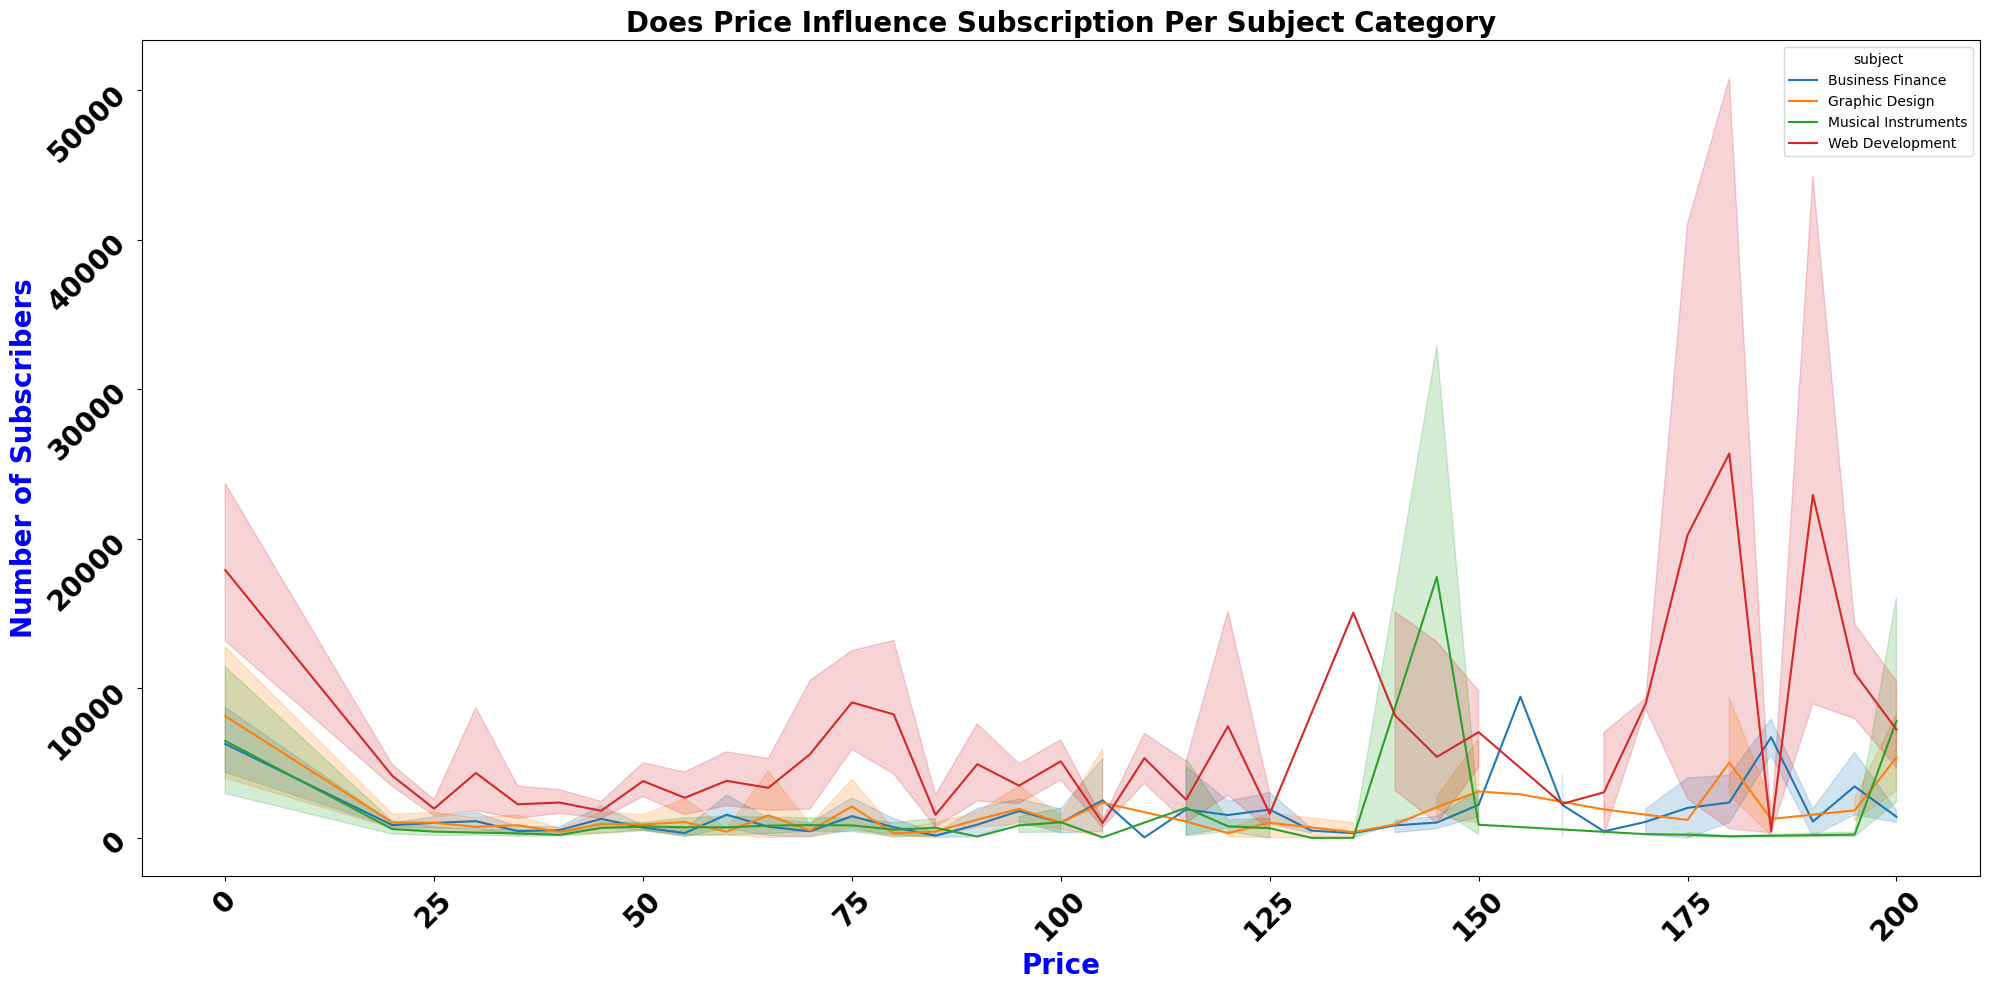

In [115]:
# Set the figure size to ensure clarity with multiple subject lines
plt.figure(figsize=(20, 10))

# Add a descriptive title to the chart
plt.title(
    "Does Price Influence Subscription Per Subject Category",
    fontsize=20,
    fontweight='bold'
)

# Create a line plot showing the relationship between price and number of subscribers
# Grouped and colored by subject using the 'hue' parameter
sn.lineplot(
    data=df,
    x='price',
    y='num_subscribers',
    hue='subject'
)

# Customize x-axis tick labels
plt.xticks(
    fontsize=20,
    fontweight='bold',
    rotation=45    # Rotate labels to prevent overlap
)

# Customize y-axis tick labels
plt.yticks(
    fontsize=20,
    fontweight='bold',
    rotation=45
)

# Label the x-axis
plt.xlabel(
    'Price',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Label the y-axis
plt.ylabel(
    'Number of Subscribers',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the final plot
plt.show()

<div class="text_cell_render border-box-sizing rendered_html">
<h3>Question on Time<a class="anchor-link" href="#Question-on-Time">¶</a>
</h3>
<ul>
<li>Published Year<ul>
<li>Number of courses per year</li>
<li>Distribution of subjects per year</li>
<li>Which year has the highest number of courses</li>
<li>What is the trend of courses per year</li>
</ul>
</li>
</ul>

</div>

In [116]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [117]:
# Extract the 'date' portion (YYYY-MM-DD) from the 'published_timestamp' column
# Assumes timestamps are in ISO format: 'YYYY-MM-DDTHH:MM:SSZ'

# Split the string on 'T' and take the first part (the date)
df['published_date'] = df['published_timestamp'].apply(lambda x: x.split('T')[0])

In [118]:
df.head(2)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   

   num_subscribers  num_reviews  num_lectures       level content_duration  \
0             2147           23            51  All Levels        1.5 hours   
1             2792          923           274  All Levels         39 hours   

    published_timestamp           subject  profit published_date  \
0  2017-01-18T20:58:58Z  Business Finance  429400     2017-01-18   
1  2017-03-09T16:34:20Z  Business Finance  209400     2017-03-09   

  published_time  year  month  day  
0      20:58:58Z  2017      1   18  
1      16:34:20Z  2017      3    9

In [119]:
# Convert 'published_date' to pandas datetime, coercing invalid entries to NaT
df['published_date'] = pd.to_datetime(df['published_date'], format="%Y-%m-%d", errors='coerce')

In [120]:
df

course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3678     775618  Learn jQuery from Scratch - Master of JavaScri...   
3679    1088178  How To Design A WordPress Website With No Codi...   
3680     635248                      Learn and Build using Polymer   
3681     905096  CSS Animations: Create Amazing Effects on Your...   
3682     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank...     True    200   
1         https://www.udemy.com/goods-and-services-tax/     True     75   
2     https://www.udemy.com/financial-modeling-for-b...     True     45   
3     https://www.udemy.com/complete-excel-finance-c...     True     95   
4     https://www.udemy.com/how-to-maximize-your-pro...     True    200   
...                                                 ...      ...    ...   
3678  https://www.udemy.com/easy-jquery-for-beginner...     True    100   
3679  https://www.udemy.com/how-to-make-a-wordpress-...     True     25   
3680  https://www.udemy.com/learn-and-build-using-po...     True     40   
3681  https://www.udemy.com/css-animations-create-am...     True     50   
3682  https://www.udemy.com/using-modx-cms-to-build-...     True     45   

      num_subscribers  num_reviews  num_lectures               level  \
0                2147           23            51          All Levels   
1                2792          923           274          All Levels   
2                2174           74            51  Intermediate Level   
3                2451           11            36          All Levels   
4                1276           45            26  Intermediate Level   
...               ...          ...           ...                 ...   
3678             1040           14            21          All Levels   
3679              306            3            42      Beginner Level   
3680              513          169            48          All Levels   
3681              300           31            38          All Levels   
3682              901           36            20      Beginner Level   

     content_duration   published_timestamp           subject  profit  \
0           1.5 hours  2017-01-18T20:58:58Z  Business Finance  429400   
1            39 hours  2017-03-09T16:34:20Z  Business Finance  209400   
2           2.5 hours  2016-12-19T19:26:30Z  Business Finance   97830   
3             3 hours  2017-05-30T20:07:24Z  Business Finance  232845   
4             2 hours  2016-12-13T14:57:18Z  Business Finance  255200   
...               ...                   ...               ...     ...   
3678          2 hours  2016-06-14T17:36:46Z   Web Development  104000   
3679        3.5 hours  2017-03-10T22:24:30Z   Web Development    7650   
3680        3.5 hours  2015-12-30T16:41:42Z   Web Development   20520   
3681          3 hours  2016-08-11T19:06:15Z   Web Development   15000   
3682          2 hours  2014-09-28T19:51:11Z   Web Development   40545   

     published_date published_time  year  month  day  
0        2017-01-18      20:58:58Z  2017      1   18  
1        2017-03-09      16:34:20Z  2017      3    9  
2        2016-12-19      19:26:30Z  2016     12   19  
3        2017-05-30      20:07:24Z  2017      5   30  
4        2016-12-13      14:57:18Z  2016     12   13  
...             ...            ...   ...    ...  ...  
3678     2016-06-14      17:36:46Z  2016      6   14  
3679     2017-03-10      22:24:30Z  2017      3   10  
3680     2015-12-30      16

In [121]:
# View rows where the conversion failed (NaT)
df[df['published_date'].isna()]

course_id                                       course_title    url  \
2066      96698  Learn Classical Guitar Technique and play 'Spa...  000!"   

      is_paid  price  num_subscribers  num_reviews  num_lectures level  \
2066     True      0               30         1463            29    52   

     content_duration published_timestamp              subject  profit  \
2066   Beginner Level             3 hours  Musical Instruments       0   

     published_date published_time  year  month  day  
2066            NaT            NaN  2017      1   18

In [122]:
# Drop the specific row at index 2066 which contains invalid 'published_date' ("3 hours")
df = df.drop(df.index[2066])

# Now check if any rows still have 'published_date' as the string "3 hours"
# This confirms whether the problematic row is gone
df[df['published_date'] == '3 hours']

Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject, profit, published_date, published_time, year, month, day]
Index: []

In [123]:
# Extract the full month name (e.g., January, February) and store it in 'Month_name'
df['Month_name'] = df['published_date'].dt.month_name()

# Display the first 5 rows to verify the new columns
df.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

  content_duration   published_timestamp           subject  profit  \
0        1.5 hours  2017-01-18T20:58:58Z  Business Finance  429400   
1         39 hours  2017-03-09T16:34:20Z  Business Finance  209400   
2        2.5 hours  2016-12-19T19:26:30Z  Business Finance   97830   
3          3 hours  2017-05-30T20:07:24Z  Business Finance  232845   
4          2 hours  2016-12-13T14:57:18Z  Business Finance  255200   

  published_date published_time  year  month  day Month_name  
0     2017-01-18      20:58:58Z  2017      1   18    January  
1     2017-03-09      16:34:20Z  2017      3    9      March  
2     2016-12-19      19:26:30Z  2016     12   19   December  
3     2017-05-30      20:07:24Z  2017      5   30        May  
4     2016-12-13      14:57:18Z  2016     12   13   December

In [124]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day',
       'Month_name'],
      dtype='object')

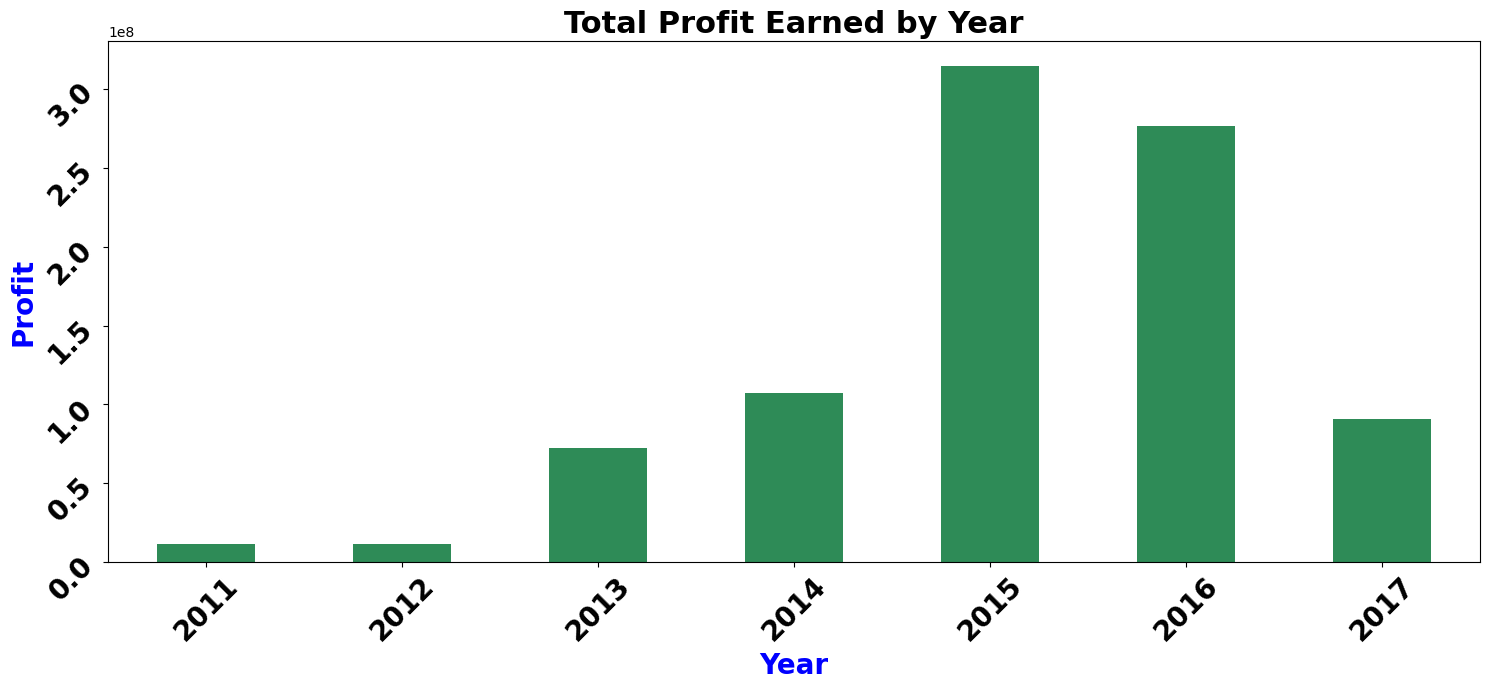

In [126]:
# Set the figure size for readability
plt.figure(figsize=(15, 7))

# Group the DataFrame by 'Year' and sum the profit for each year, then plot as a bar chart
df.groupby('year')['profit'].sum().plot(
    kind='bar',             # Vertical bar chart
    color='seagreen'        # Optional: visually distinct color
)

# Customize x-axis tick labels (years)
plt.xticks(
    fontsize=20,
    fontweight='bold',
    rotation=45             # Rotate for better spacing
)

# Customize y-axis tick labels
plt.yticks(
    fontsize=20,
    fontweight='bold',
    rotation=45
)

# Add x-axis label
plt.xlabel(
    'Year',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Add y-axis label
plt.ylabel(
    'Profit',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Add a title for clarity (optional)
plt.title('Total Profit Earned by Year', fontsize=22, fontweight='bold')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

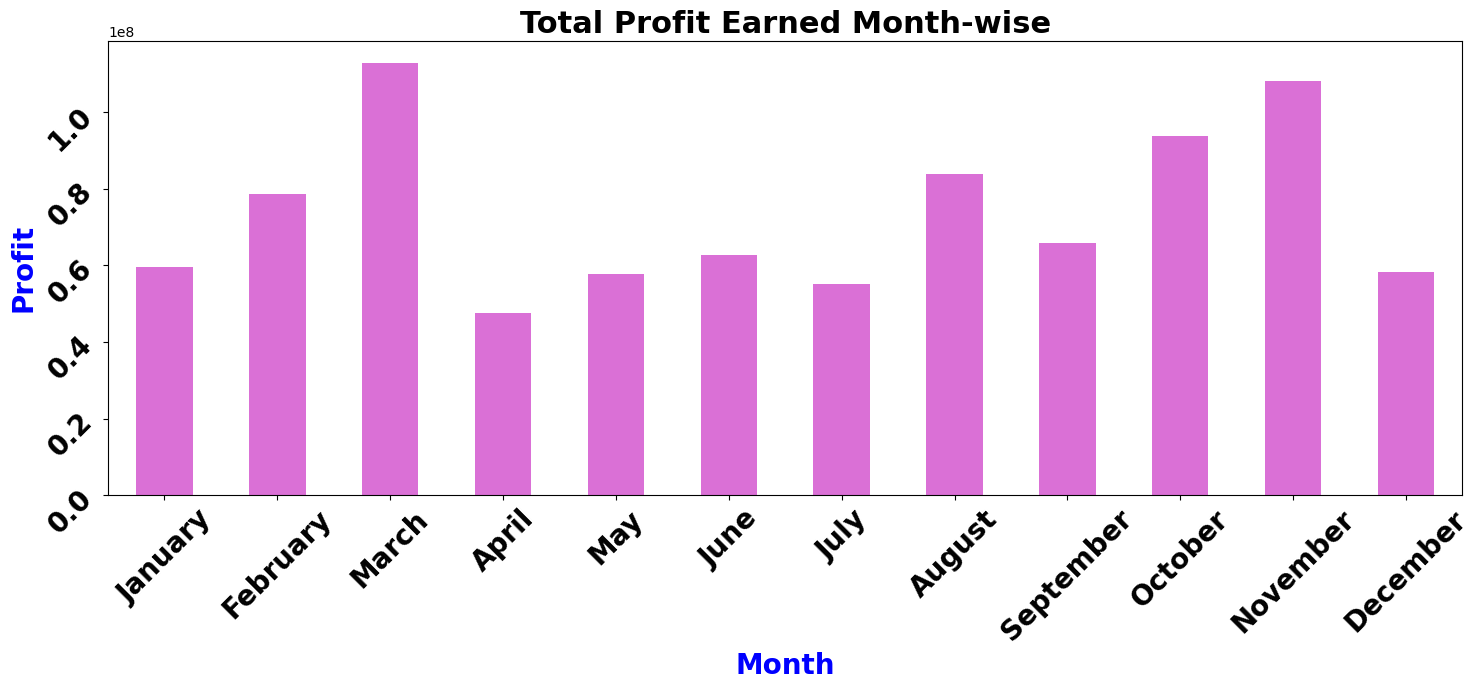

In [127]:
# First, define the correct chronological order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Group the DataFrame by 'Month_name' and calculate total profit per month
monthly_profit = df.groupby('Month_name')['profit'].sum()

# Reindex the Series to follow chronological month order
monthly_profit = monthly_profit.reindex(month_order)

# Set the figure size for clarity
plt.figure(figsize=(15, 7))

# Plot the ordered monthly profit as a vertical bar chart
monthly_profit.plot(
    kind='bar',
    color='orchid'  # Optional: distinct color for visual appeal
)

# Set axis labels and formatting
plt.xticks(fontsize=20, fontweight='bold', rotation=45)
plt.yticks(fontsize=20, fontweight='bold', rotation=45)

plt.xlabel('Month', fontsize=20, fontweight='bold', color='blue')
plt.ylabel('Profit', fontsize=20, fontweight='bold', color='blue')
plt.title('Total Profit Earned Month-wise', fontsize=22, fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the final chart
plt.show()

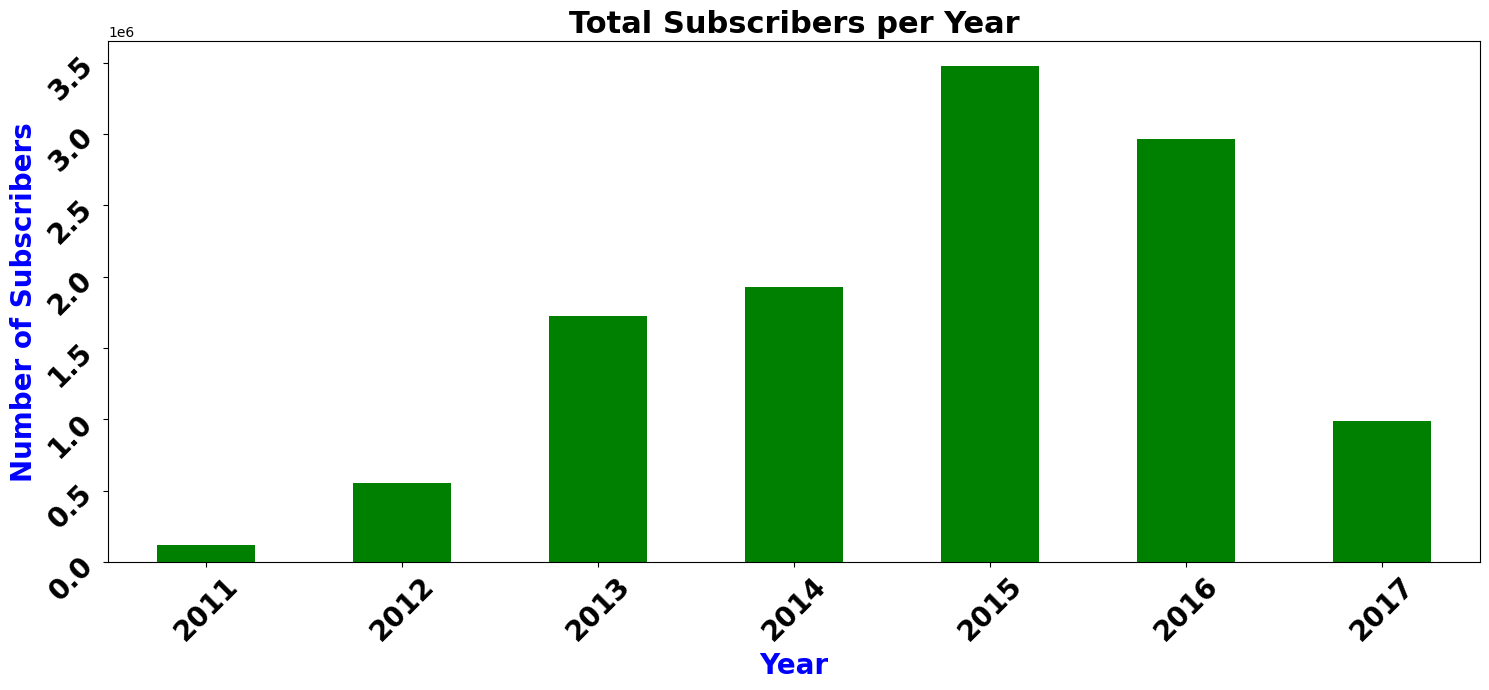

In [128]:
# Set the figure size for a clear and readable chart
plt.figure(figsize=(15, 7))

# Group the dataset by 'Year' and sum the number of subscribers for each year
# Plot the result as a vertical bar chart
df.groupby('year')['num_subscribers'].sum().plot(
    kind='bar',          # Vertical bar chart
    color='green'        # Use green to represent growth
)

# Customize tick labels on the x-axis (years)
plt.xticks(
    fontsize=20,
    fontweight='bold',
    rotation=45           # Rotate for better readability
)

# Customize tick labels on the y-axis (subscriber count)
plt.yticks(
    fontsize=20,
    fontweight='bold',
    rotation=45
)

# Label the x-axis
plt.xlabel(
    'Year',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Label the y-axis
plt.ylabel(
    'Number of Subscribers',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Add a title for clarity (optional)
plt.title('Total Subscribers per Year', fontsize=22, fontweight='bold')

# Adjust layout for a polished look
plt.tight_layout()

# Display the final chart
plt.show()

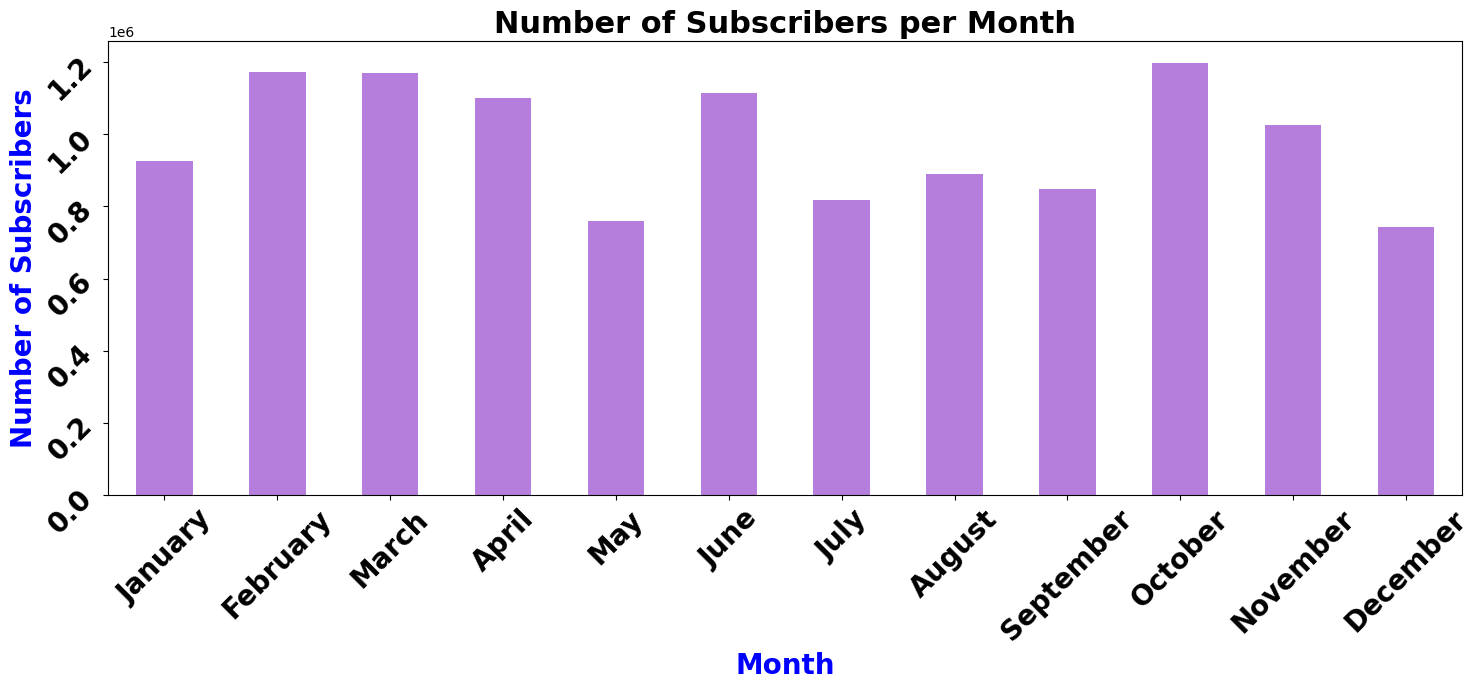

In [129]:
# Define the correct chronological order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Group the DataFrame by 'Month_name' and sum the number of subscribers per month
monthly_subscribers = df.groupby('Month_name')['num_subscribers'].sum()

# Reorder the index based on actual calendar order
monthly_subscribers = monthly_subscribers.reindex(month_order)

# Set figure size for clarity
plt.figure(figsize=(15, 7))

# Plot the reordered monthly subscriber counts
monthly_subscribers.plot(
    kind='bar',
    color='#b57edc'  # Light purple color
)

# Customize tick labels and appearance
plt.xticks(fontsize=20, fontweight='bold', rotation=45)
plt.yticks(fontsize=20, fontweight='bold', rotation=45)

# Correct axis label: replace "Year" with "Month"
plt.xlabel('Month', fontsize=20, fontweight='bold', color='blue')
plt.ylabel('Number of Subscribers', fontsize=20, fontweight='bold', color='blue')

# Add a title for clarity
plt.title('Number of Subscribers per Month', fontsize=22, fontweight='bold')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

<div class="text_cell_render border-box-sizing rendered_html">
<h4>Questions on Course Title<a class="anchor-link" href="#Questions-on-Course-Title">¶</a>
</h4>
<ul>
<li>Course Title<ul>
<li>What is the most frequent words in course title</li>
<li>Longest/Shortest course title</li>
<li>How can we build recommendation systems via title using similarity</li>
<li>Most famous courses by number of subscribers</li>
</ul>
</li>
</ul>

</div>

In [130]:
df.head(3)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   

  content_duration   published_timestamp           subject  profit  \
0        1.5 hours  2017-01-18T20:58:58Z  Business Finance  429400   
1         39 hours  2017-03-09T16:34:20Z  Business Finance  209400   
2        2.5 hours  2016-12-19T19:26:30Z  Business Finance   97830   

  published_date published_time  year  month  day Month_name  
0     2017-01-18      20:58:58Z  2017      1   18    January  
1     2017-03-09      16:34:20Z  2017      3    9      March  
2     2016-12-19      19:26:30Z  2016     12   19   December

In [131]:
# Calculate the maximum length of course titles in the dataset
max_title_length = df['course_title'].str.len().max()

# Filter the DataFrame to get the course(s) with the longest title
longest_title_course = df[df['course_title'].str.len() == max_title_length]

# Display the result
longest_title_course

course_id                                       course_title  \
2191     286898  Aprende a tocar el Acordeón 'de oído y con téc...   

                                                    url  is_paid  price  \
2191  https://www.udemy.com/aprende-los-secretos-de-...     True     75   

      num_subscribers  num_reviews  num_lectures       level content_duration  \
2191              158           17            59  All Levels        2.5 hours   

       published_timestamp              subject  profit published_date  \
2191  2014-07-28T13:55:43Z  Musical Instruments   11850     2014-07-28   

     published_time  year  month  day Month_name  
2191      13:55:43Z  2014      7   28       July

In [135]:
df['course_title'].iloc[2190]

'Aprende a tocar el Acordeón \'de oído y con técnica",https://www.udemy.com/aprende-a-tocar-el-acordeon-de-oido-y-con-tecnica/,true,25,93,21,34,Beginner Level,4 hours,2014-09-16T19:51:45Z\n263432,Aprende los Secretos de la Armónica con HARP&SOUL"'

In [136]:
df.iloc[2190]

course_id                                                         286898
course_title           Aprende a tocar el Acordeón 'de oído y con téc...
url                    https://www.udemy.com/aprende-los-secretos-de-...
is_paid                                                             True
price                                                                 75
num_subscribers                                                      158
num_reviews                                                           17
num_lectures                                                          59
level                                                         All Levels
content_duration                                               2.5 hours
published_timestamp                                 2014-07-28T13:55:43Z
subject                                              Musical Instruments
profit                                                             11850
published_date                                     

In [137]:
# Find the maximum number of reviews among all courses
max_reviews = df['num_reviews'].max()

# Filter the DataFrame to get the course(s) with the highest number of reviews
most_reviewed_course = df[df['num_reviews'] == max_reviews]

# Display the most reviewed course(s)
most_reviewed_course

course_id                course_title  \
3235     625204  The Web Developer Bootcamp   

                                                    url  is_paid  price  \
3235  https://www.udemy.com/the-web-developer-bootcamp/     True    200   

      num_subscribers  num_reviews  num_lectures       level content_duration  \
3235           121584        27445           342  All Levels         43 hours   

       published_timestamp          subject    profit published_date  \
3235  2015-11-02T21:13:27Z  Web Development  24316800     2015-11-02   

     published_time  year  month  day Month_name  
3235      21:13:27Z  2015     11    2   November

In [138]:
# Calculate the minimum length of course titles in the dataset
min_title_length = df['course_title'].str.len().min()

# Filter the DataFrame to find the course(s) with the shortest title
shortest_title_course = df[df['course_title'].str.len() == min_title_length]

# Display the result
shortest_title_course

course_id course_title                              url  is_paid  price  \
1328    1164570       调色高级讲解  https://www.udemy.com/dezepioy/     True    200   
1674    1164720       调色中级课程  https://www.udemy.com/ixlnjjvn/     True    200   

      num_subscribers  num_reviews  num_lectures           level  \
1328                4            2             8  Beginner Level   
1674                5            3             7  Beginner Level   

     content_duration   published_timestamp         subject  profit  \
1328           1 hour  2017-03-31T17:16:15Z  Graphic Design     800   
1674           1 hour  2017-03-31T17:19:38Z  Graphic Design    1000   

     published_date published_time  year  month  day Month_name  
1328     2017-03-31      17:16:15Z  2017      3   31      March  
1674     2017-03-31      17:19:38Z  2017      3   31      March

In [139]:
df['course_title'].iloc[1327]

'超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜'

In [140]:
df.iloc[1327]

course_id                                              1009622
course_title              超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜
url                    https://www.udemy.com/blender-beginner/
is_paid                                                   True
price                                                       80
num_subscribers                                              8
num_reviews                                                  1
num_lectures                                                43
level                                           Beginner Level
content_duration                                     5.5 hours
published_timestamp                       2016-12-14T01:25:19Z
subject                                         Graphic Design
profit                                                     640
published_date                             2016-12-14 00:00:00
published_time                                       01:25:19Z
year                                                   

### Keyword Extraction

<ul>
<li>Rake</li>
<li>Yakes</li>
<li>Collection</li>
</ul>

In [141]:
# Install the 'neattext' library
# This library simplifies common NLP tasks like:
# - Removing stopwords
# - Removing punctuation or special characters
# - Tokenization (splitting text into words)

!pip install neattext

In [142]:
# Text Cleaning to remove stopwords
# Importing necessary libraries
import neattext.functions as nfx

In [143]:
# List all available functions and utilities in neattext.functions
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [144]:
# Remove all stopwords from the course titles and store the cleaned version in a new column
# Stopwords include common words like: the, is, in, at, etc., which carry little meaning
df['Clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

# Display a sample of cleaned course titles (from index 1 to 4)
df['Clean_title'].iloc[1:5]

1    Complete GST Course & Certification - Grow Pra...
2     Financial Modeling Business Analysts Consultants
3         Beginner Pro - Financial Analysis Excel 2017
4                     Maximize Profits Trading Options
Name: Clean_title, dtype: object

In [145]:
# Create a temporary DataFrame to compare original vs cleaned course titles
# 'course_title' is the original title
# 'Clean_title' is the version with stopwords and noise removed
temp = df[['Clean_title', 'course_title']]

# Display the first 5 rows to observe how the cleaning has modified the titles
temp.head()

Clean_title  \
0                 Ultimate Investment Banking Course   
1  Complete GST Course & Certification - Grow Pra...   
2   Financial Modeling Business Analysts Consultants   
3       Beginner Pro - Financial Analysis Excel 2017   
4                   Maximize Profits Trading Options   

                                        course_title  
0                 Ultimate Investment Banking Course  
1  Complete GST Course & Certification - Grow You...  
2  Financial Modeling for Business Analysts and C...  
3  Beginner to Pro - Financial Analysis in Excel ...  
4       How To Maximize Your Profits Trading Options

In [146]:
# Find the maximum length of the cleaned course titles
max_clean_title_length = temp['Clean_title'].str.len().max()

# Filter and display the row(s) that have the longest cleaned title
longest_clean_title = temp[temp['Clean_title'].str.len() == max_clean_title_length]

# Show the result
longest_clean_title

Clean_title  \
2191  Aprende tocar el Acordeón 'de oído con técnica...   

                                           course_title  
2191  Aprende a tocar el Acordeón 'de oído y con téc...

In [147]:
temp['Clean_title'].iloc[293]

'Multiply returns \'Value Investing",https://www.udemy.com/multiply-your-returns-using-value-investing/,true,20,1942,19,63,All Levels,4.5 hours,2015-07-23T00:08:33Z 874284,Weekly Forex Analysis Baraq FX"'

In [148]:
temp['course_title'].iloc[293]

'Multiply your returns using \'Value Investing",https://www.udemy.com/multiply-your-returns-using-value-investing/,true,20,1942,19,63,All Levels,4.5 hours,2015-07-23T00:08:33Z\n874284,Weekly Forex Analysis by Baraq FX"'

In [149]:
# Remove any remaining special characters from the 'Clean_title' column
# This step ensures titles contain only letters and spaces (no punctuation, symbols, etc.)
df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)

# Display a few cleaned titles (after special character removal) to verify the output
df['Clean_title'].iloc[1:5]

1    Complete GST Course  Certification  Grow Practice
2     Financial Modeling Business Analysts Consultants
3          Beginner Pro  Financial Analysis Excel 2017
4                     Maximize Profits Trading Options
Name: Clean_title, dtype: object

In [150]:
# Convert the 'Clean_title' column to a Python list
# This is useful before applying tokenization or text vectorization
all_title_list = df['Clean_title'].to_list()

# Preview a few cleaned course titles (from index 1 to 4)
all_title_list[1:5]

['Complete GST Course  Certification  Grow Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Pro  Financial Analysis Excel 2017',
 'Maximize Profits Trading Options']

In [151]:
# Flatten the list of all tokens from all course titles
# For each title (line), split it into words (tokens), and collect all tokens in a single list
alltokens = [token for line in all_title_list for token in line.split()]

# Print the total number of tokens (i.e., total word instances)
print(len(alltokens))

# Show a few sample tokens from the list
print(alltokens[1:4])

19316
['Investment', 'Banking', 'Course']


In [152]:
# Import Counter from the collections module to count word frequencies
from collections import Counter

# Use Counter to count how often each word appears in the token list
# Then retrieve the top 50 most common words and convert to a dictionary
freq_words = dict(Counter(alltokens).most_common(50))

# Display the top 50 most frequent words in course titles
freq_words

{'Learn': 491,
 'Trading': 280,
 'Beginners': 246,
 'Course': 231,
 'Guitar': 208,
 'Web': 205,
 'Design': 187,
 'Complete': 181,
 'Piano': 177,
 'Photoshop': 166,
 'Forex': 163,
 'Build': 161,
 'Financial': 139,
 'Create': 135,
 'JavaScript': 123,
 'Beginner': 120,
 'Guide': 116,
 'HTML': 116,
 'Accounting': 113,
 'Website': 110,
 'Development': 110,
 '2': 106,
 'PHP': 105,
 'Options': 101,
 'Adobe': 100,
 'Play': 98,
 '1': 97,
 'de': 97,
 'Introduction': 93,
 'CSS': 92,
 'Master': 90,
 'Illustrator': 90,
 'Basics': 88,
 'WordPress': 83,
 'Scratch': 82,
 'Analysis': 78,
 'Professional': 78,
 'Advanced': 77,
 'Easy': 76,
 'Level': 76,
 'Lessons': 73,
 '4': 67,
 'Stock': 65,
 'HTML5': 65,
 'Trade': 64,
 'Bootstrap': 64,
 '3': 63,
 'Business': 62,
 'play': 61,
 'Angular': 57}

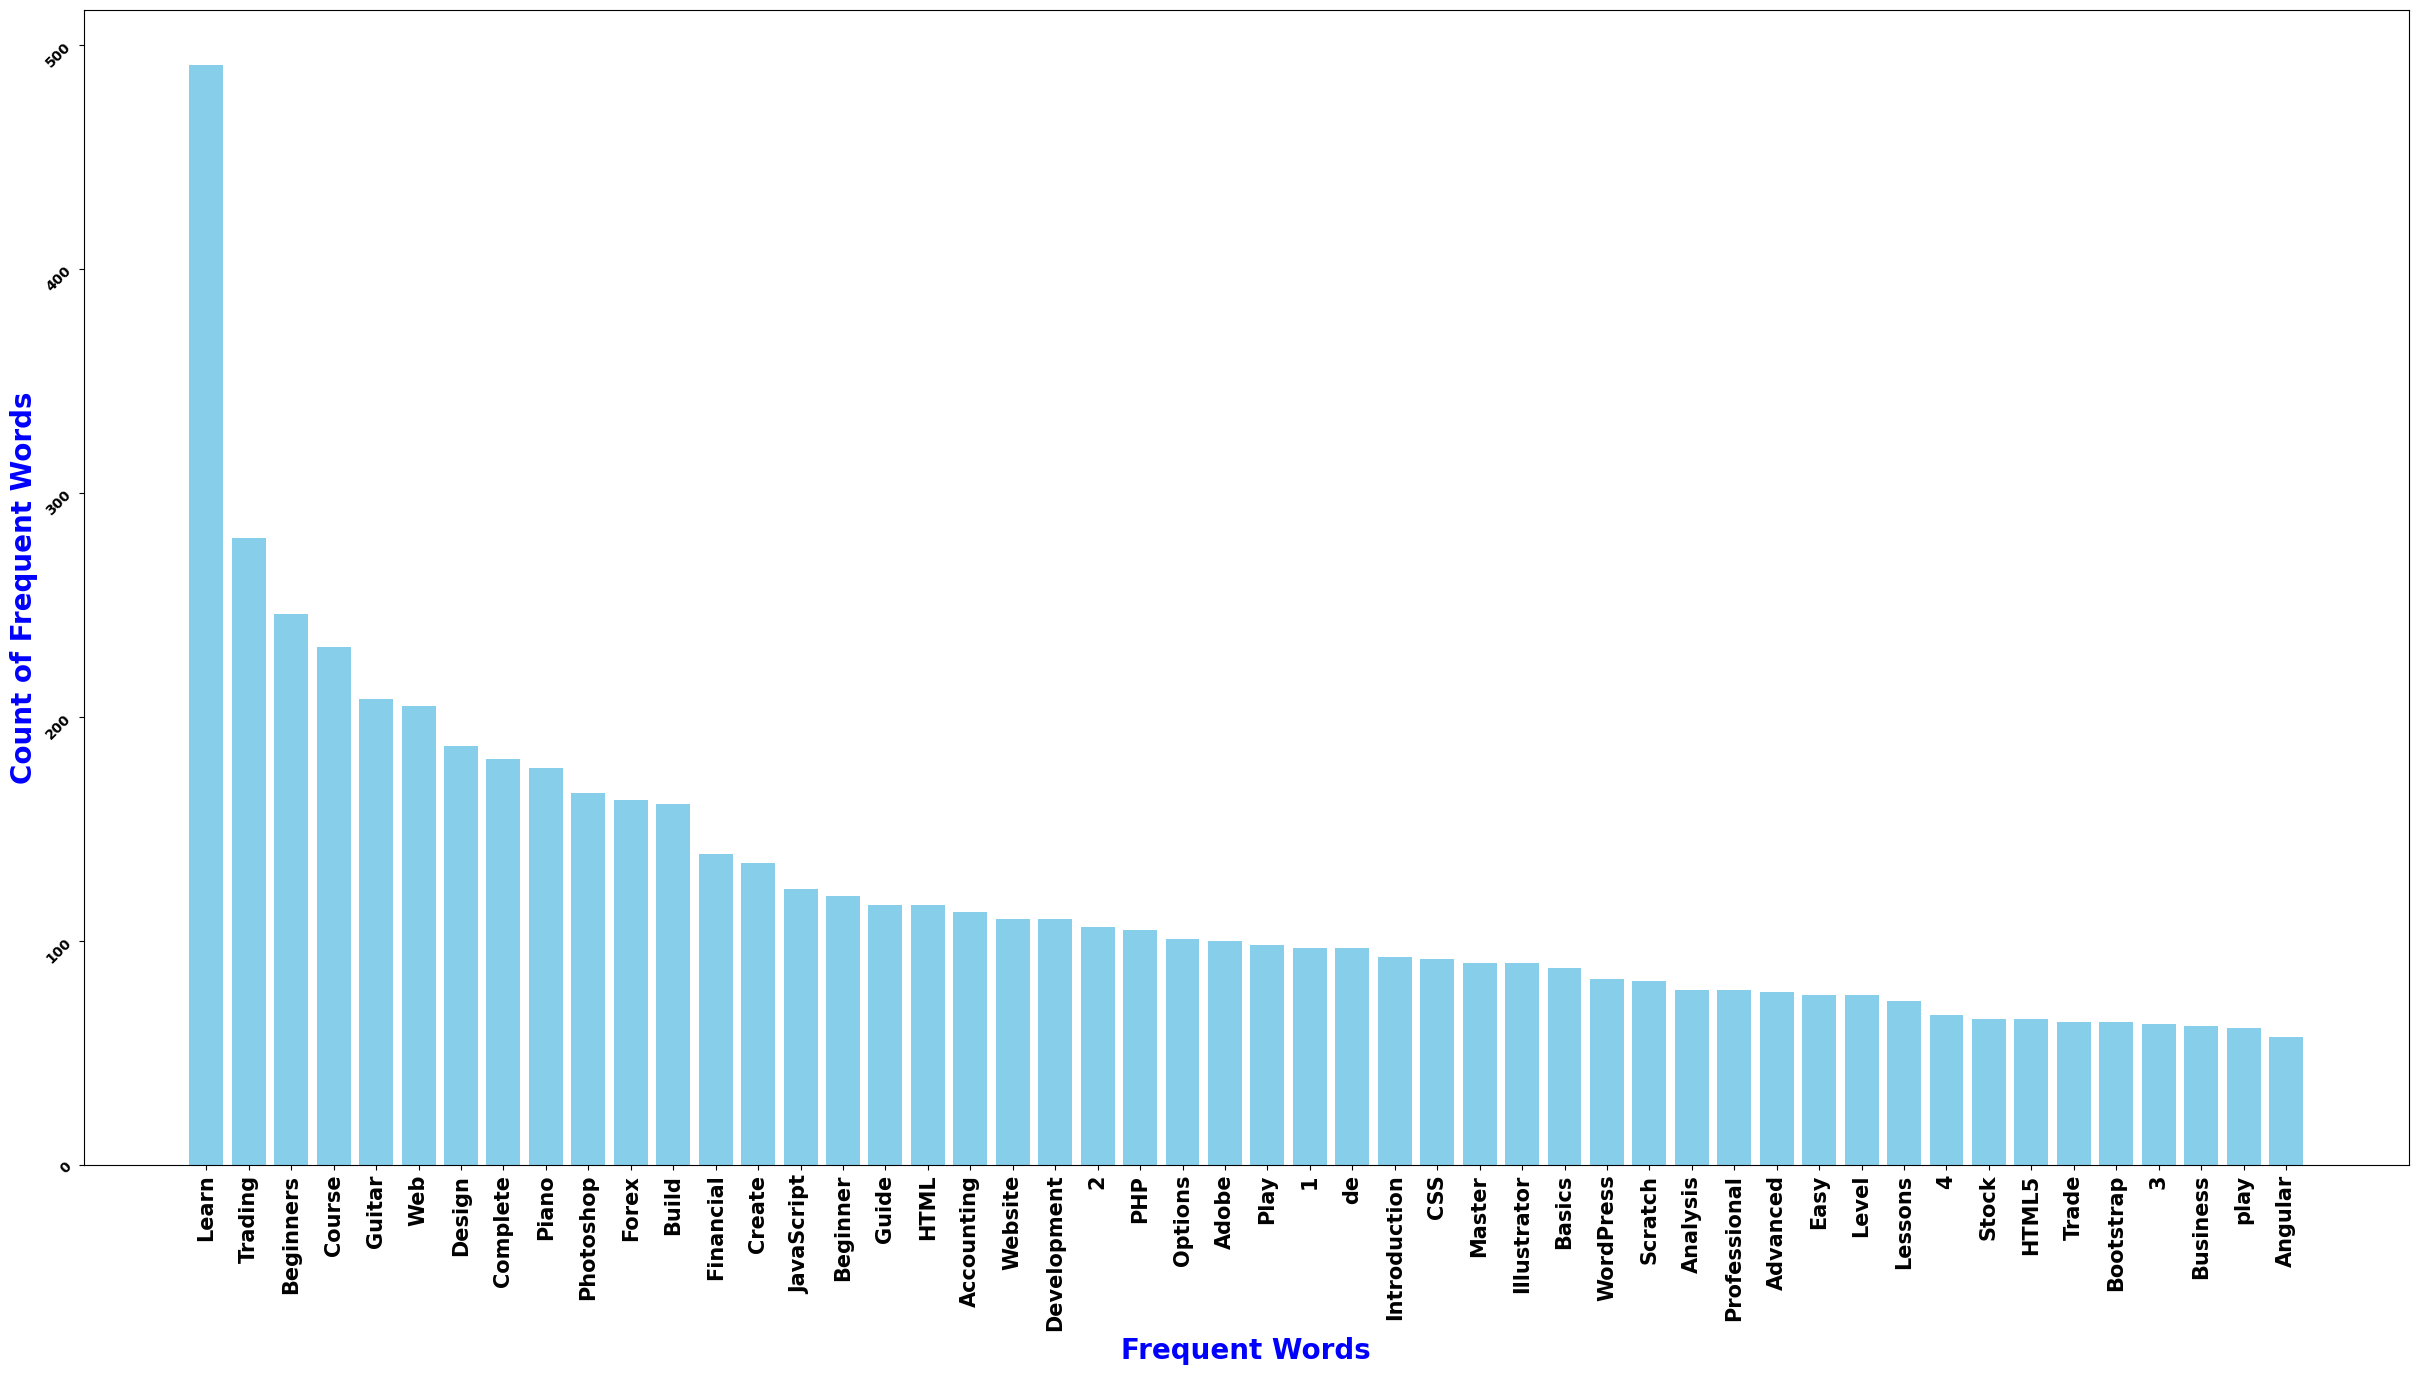

In [155]:
# Set the figure size for a large, readable plot
plt.figure(figsize=(30, 15))

# Plot the word frequencies using a bar chart
# *zip(*dict.items()) unpacks keys and values for plotting
plt.bar(*zip(*freq_words.items()), color='skyblue')

# Customize x-axis tick labels for readability
plt.xticks(
    rotation=90,
    fontsize=15,
    fontweight='bold'
)

# Customize y-axis tick labels
plt.yticks(
    fontsize=10,
    fontweight='bold',
    rotation=45
)

# Set the x-axis label
plt.xlabel(
    'Frequent Words',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Set the y-axis label
plt.ylabel(
    'Count of Frequent Words',
    fontsize=20,
    fontweight='bold',
    color='blue'
)

# Display the bar chart
plt.show()

In [156]:
# Install the 'rake_nltk' package
# RAKE (Rapid Automatic Keyword Extraction) is a powerful NLP tool used to extract key phrases
!pip install rake_nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp311-cp311-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-win_amd64.whl (274 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ---------

##### Tokenization

In [157]:
from rake_nltk import Rake

# Initialize the RAKE keyword extractor
rake = Rake()

# Combine all tokens into a single string, separating each word with a space
allwords = ' '.join(alltokens)

# Extract keywords from the combined string
rake.extract_keywords_from_text(allwords)

In [158]:
# Get a list of keyword phrases ranked by their relevance score
# Each item in the list is a tuple: (score, keyword_phrase)
ranked_phrases_with_scores = rake.get_ranked_phrases_with_scores()

# Example: Display the top 10 scored keyword phrases
for score, phrase in ranked_phrases_with_scores[:10]:
    print(f"{score:.2f} -> {phrase}")

1932000.84 -> angular 2 angular 4 complete aspnet mvc 5 course graphql react complete developers guide create simple photo gallery dropzonejs slick php wordpress hour createmanage website twitter bootstrap 2 beginners bootstrap tutorial essentials basic advanced create engaging website twitter bootstrap 2x javascript basics beginners css tutorial beginners style wordpress templates html5 css3 build modern responsive websites psd html5css3 twitter bootstrap 3 web development website sell thousands wordpress basics business share sell expertise php zend framework 2creating crud application javascript fundamentals building website jekyll big data apache hadoop developers fundamentals wordpress development create custom wordpress website wordpress website 2017 restful services aspnet web api web hosting fundamentals learning path react stunning react websites administering microsoft sql server 2012 databases 70462 php codeignitercrud concepts mvc adobe experience manager cms basics introdu